#                       Time Series -  Anh Thu DOAN

## Understanding basic concepts in Time Series

### From White Noise to ACF plots

#### 1. Simulate a white noise for 200 observations and plot it

In [1]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# create white noise series
series = np.random.normal(size=200)

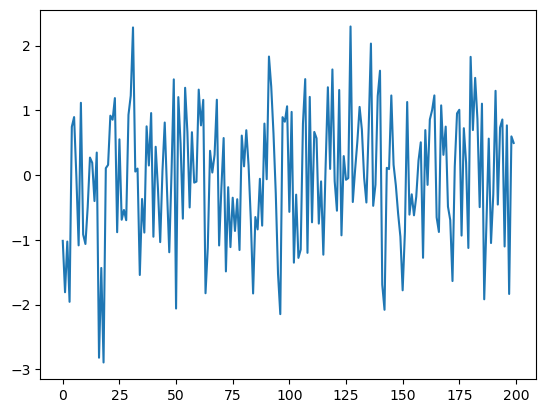

In [3]:
# line plot
plt.plot(series)
plt.show()

####  2. Create a white noise with mean = 4, sd = 2. Then use the arima function to estimate the parameters

In [4]:
wn = np.random.normal(loc=4, scale=2, size=200)

In [5]:
mean = np.mean(wn)
sd = np.std(wn)

In [6]:
mean

4.007737988928401

In [7]:
sd

1.8992566540511027

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

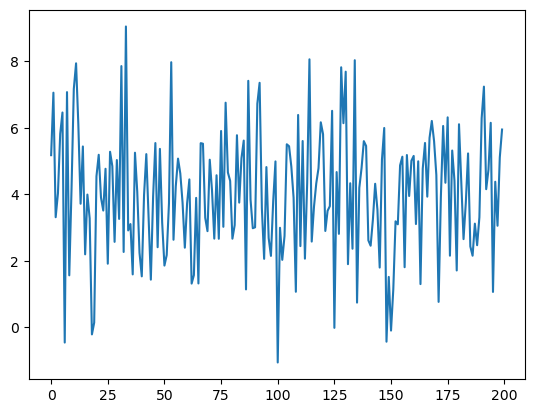

In [9]:
plt.plot(wn)
plt.show()

In [10]:
from statsmodels.tsa.arima.model import ARIMA
# Fit an ARIMA model to the white noise
model = ARIMA(wn, order=(1,0,0))
model_fit = model.fit()

# Print the model parameters
print(model_fit.params)

[ 4.00674476 -0.06928327  3.58975971]


#### 3. Explain with your own words what a random walk is (minimum 100 words). Explain with your own words what stationarity means for a time series

A random walk is a process by which randomly moving objects wander away from where they started. It describes the trajectory of an object as it moves randomly through space, with each step being determined by a randomly generated direction and distance.

Stationarity means that the statistical properties of a time series do not change over time. Which mean that the mean, variance do not change over time. Time series data are stationary if they have no other trend and seasonality. When time series data are stationary, they can be easily modelled with greater accuracy.

#### 4. Create a random walk series, plot it, calculate the first difference series and plot it

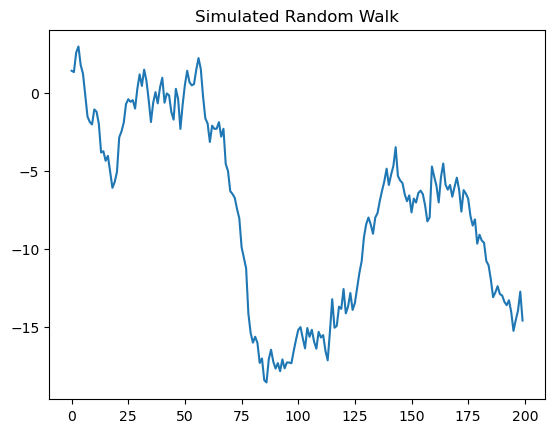

In [11]:
steps = np.random.normal(loc=0, scale=1, size=200)
P = np.cumsum(steps)
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

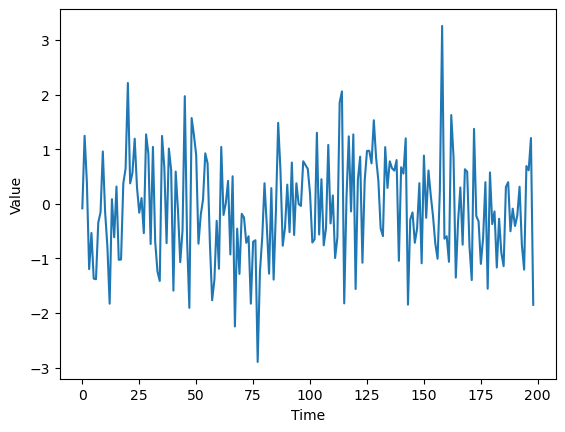

In [12]:
# Calculate the first difference series
y_diff = np.diff(P)
plt.plot(y_diff)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### 5. Generate WN drift data, convert it to a random walk and plot it

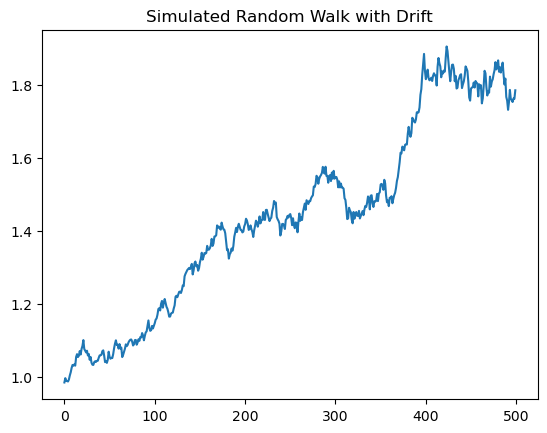

In [13]:
steps = np.random.normal(loc=0.001, scale=0.01, size=500)+1
P = np.cumprod(steps)
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

#### 6. Plot the ACF on the white noise and of the random walk. What’s the characteristic of a white noise ACF ? Perform a Ljung-Box Test. Command : Box.test in R, ljung is an option.

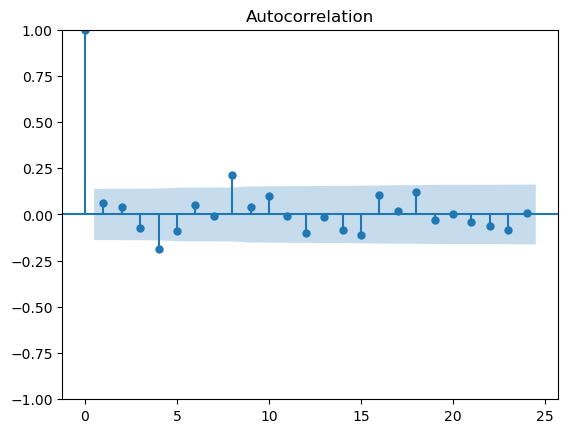

In [14]:
# ACF on white noise
plot_acf(series)
plt.show()

95% of the spikes in the ACF to lie within ±2/√T ± 2 / T where T is the length of the time series.

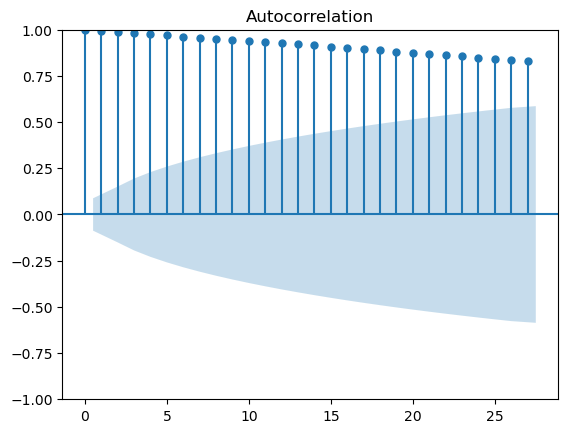

In [15]:
# ACF on random walk
plot_acf(P)
plt.show()

#### Perform a Ljung-Box Test

In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [17]:
acorr_ljungbox(series, return_df=True)

lb_stat  lb_pvalue
1    0.717729   0.396890
2    1.077322   0.583529
3    2.246660   0.522816
4    9.317590   0.053633
5   10.958577   0.052207
6   11.505056   0.073966
7   11.513511   0.117736
8   21.070513   0.006962
9   21.384437   0.011049
10  23.484814   0.009092

## Understanding ACF and PACF

#### 1. Use the arima.sim function (or Python equivalent) to generate time series based on the autoregressive model, with slopes comprised between -1 and 1. What do you observe ? Plot them, and the acf functions along with it. Do the same with the moving average model. What do you observe ?

In [18]:
# Autoregressive model
from statsmodels.tsa.ar_model import AutoReg

# Generate time series data
np.random.seed(0)
slope = np.random.uniform(-1,1)
ar = np.random.normal(0,1,300)
for i in range(1,len(ar)):
    ar[i] += slope * ar[i-1]

# Fit an AR(1) model to the data
model = AutoReg(ar, lags = 1)
model_fit = model.fit()

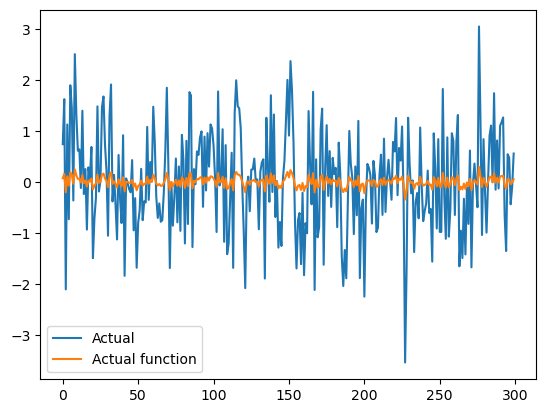

In [19]:
# Plot of the data
plt.plot(ar, label='Actual')
plt.plot(slope*ar, label='Actual function')
plt.legend()
plt.show()

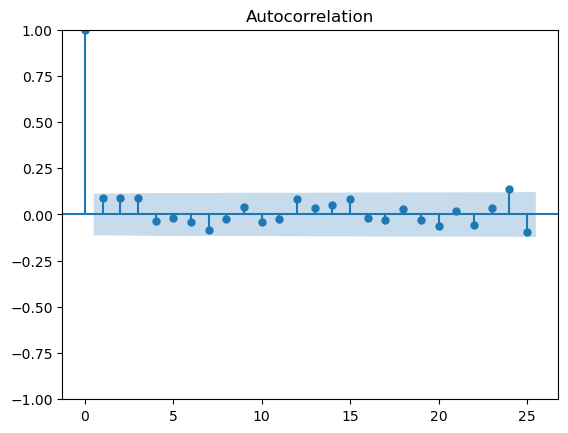

In [20]:
plot_acf(ar)
plt.show()

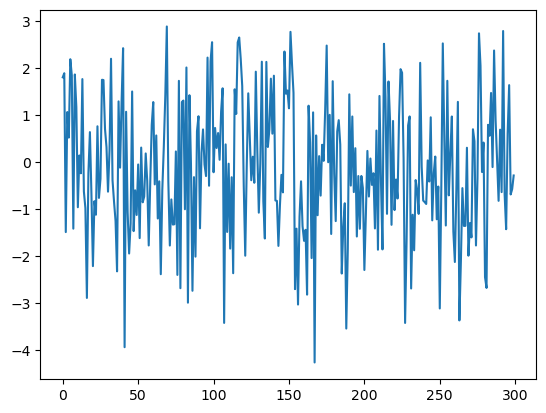

In [21]:
from statsmodels.tsa.arima_process import ArmaProcess
# Moving average
np.random.seed(0)
slope = np.random.uniform(-1,1)

# Generate white noise with the desired slope
noise = np.random.normal(0,1,300)
for i in range(1, len(noise)):
    noise[i] += slope * noise[i-1]

# Generate MA(1) process
ma1 = np.array([1])
MA_object = ArmaProcess(ar = [1], ma = ma1)
simulated_data = MA_object.generate_sample(nsample = 300) + noise

plt.plot(simulated_data)
plt.show()

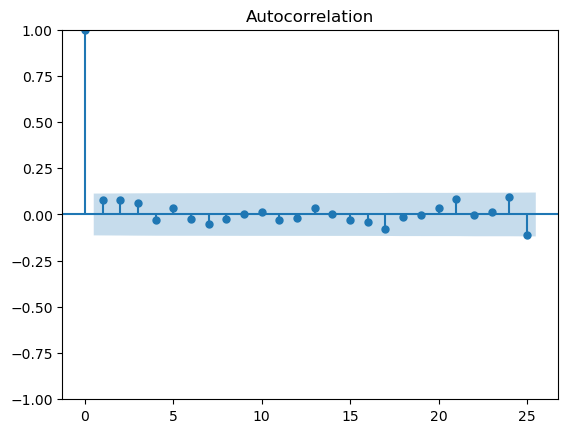

In [22]:
plot_acf(simulated_data)
plt.show()

#### 2. Out of this time series, create the same time series but with a lag 1.

In [23]:
lag1 = np.roll(simulated_data, -1)

#### 3. Join the two time series as datasets, and look at them using the head command

In [24]:
ts_df = pd.DataFrame({'Original': simulated_data, 'Lagged': lag1})

In [25]:
ts_df.head()

Original    Lagged
0  1.809425  1.896909
1  1.896909 -1.490352
2 -1.490352  1.068960
3  1.068960  0.523930
4  0.523930  2.195146

#### 4. Compute the correlation between the two time series (the second being the shifted one), and plot an acf function, with a maximum lag of 1, for the original time series.

In [26]:
corr = ts_df.corr()
print(corr)

          Original    Lagged
Original  1.000000  0.078754
Lagged    0.078754  1.000000


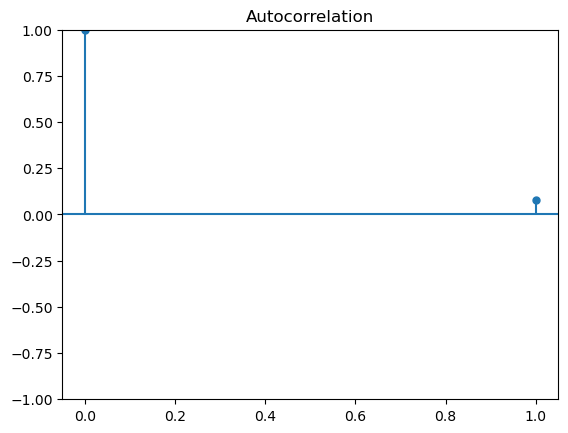

In [27]:
# Plot the ACF for the original time series
plot_acf(simulated_data, lags=1)
plt.show()

#### 5. How do you obtain the value of the second lag of the ACF ?

In [28]:
lag2 = np.roll(simulated_data,-2)

# calculate correlation
corr_lag2 = np.corrcoef(simulated_data, lag2)[0,1]
print(corr_lag2)

0.07809356285843796


#### 6. Explain the ideas underlying a PACF plot

* To identify the order of an autoregessive (AR) model.
* Estimate the linear dependence between a variable and its lagged values.

#### 7. Write a code to compute the values of the first two lags of the PACF out of time series that you have created. Why do we the use of residuals of a linear model to compute such values ? Why are ”future data” used to predict ”past data” ?

In [29]:
from statsmodels.tsa.stattools import pacf

# Compute the partial autocorrelations for the first two lags
pacf_lags = pacf(ar, nlags=2, method='ols')

# Print the values of the partial autocorrelations
print("PACF values for lags 1 and 2:", pacf_lags)

PACF values for lags 1 and 2: [1.         0.08677567 0.08404039]


Why do we the use of residuals of a linear model to compute such values? 
* Because the residuals are the differences between the observed values and the predicted values of the time series

Why are ”future data” used to predict ”past data” ?
   * Backcasting is a technique used in time series analysis to estimate the past values of a variable based on the information from the future. 

## ARMA models

#### 1. Contrast AR(1) and AR(2) models. How do they differ ?

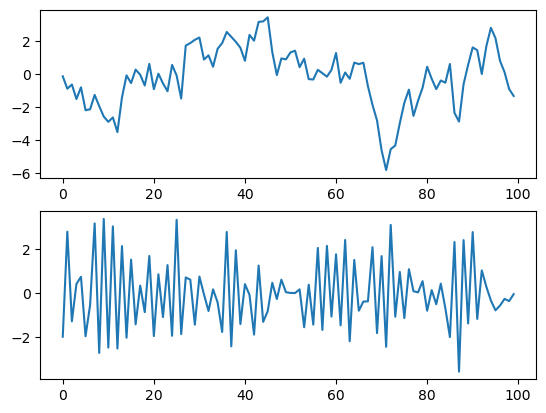

In [30]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=100)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=100)
plt.plot(simulated_data_2)
plt.show()

#### 2. What is the difference between an Autocorrelation Function and a Partial autocorrelation Function ? (Min. 150 words)
The autocorrelation function at lag-n is the correlation between a time series and the same time series offset by n step.
The partial autocorrelation is the correlation between a time series and the lagged version of itself after we subtract the effect of correlation at smaller lags. So it is the correlation associated with just that particular lag.

#### 3. Plot the ACF and the PACF of an AR, a MA, and ARMA models. What are the main differences ?

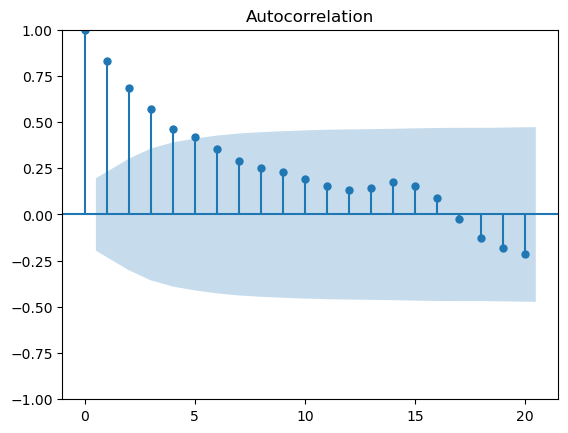

In [31]:
# ACF for AR
plot_acf(simulated_data_1)
plt.show()

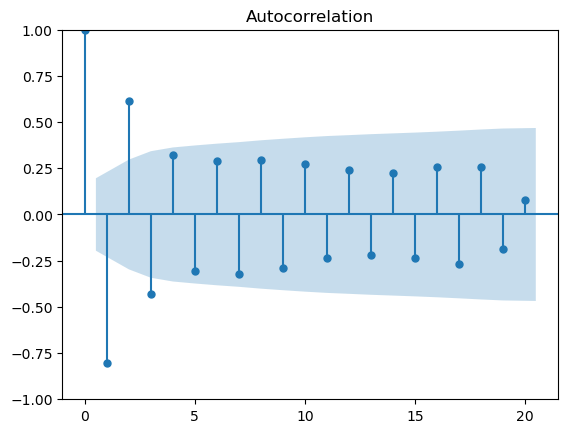

In [32]:
# ACF for MR
plot_acf(simulated_data_2)
plt.show()

In [33]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.graphics.tsaplots import plot_pacf

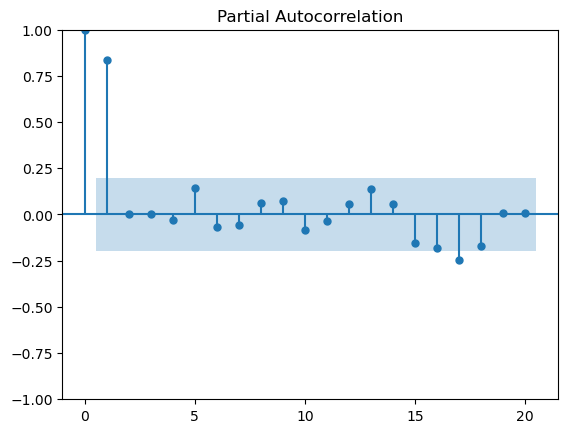

In [34]:
# Plot PACF for AR
plot_pacf(simulated_data_1, lags=20)
plt.show()

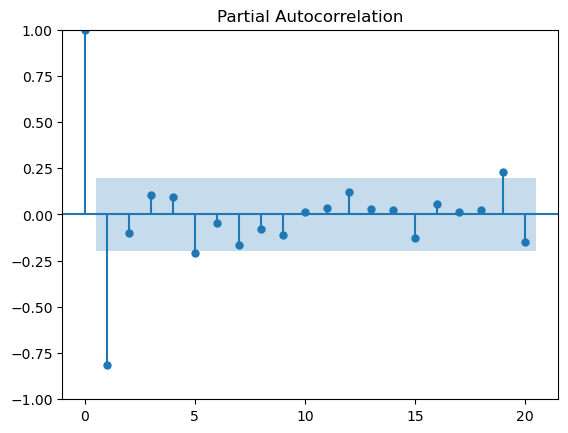

In [35]:
# Plot PACF for MR
plot_pacf(simulated_data_2, lags=20)
plt.show()

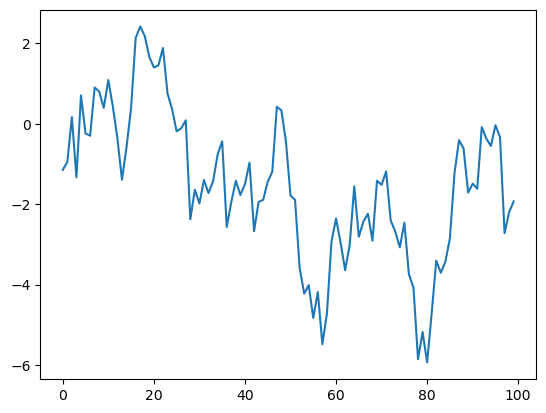

In [36]:
ARMA_object1 = ArmaProcess(ar1, ma2)
simulated_data = ARMA_object1.generate_sample(nsample=100)
plt.plot(simulated_data)

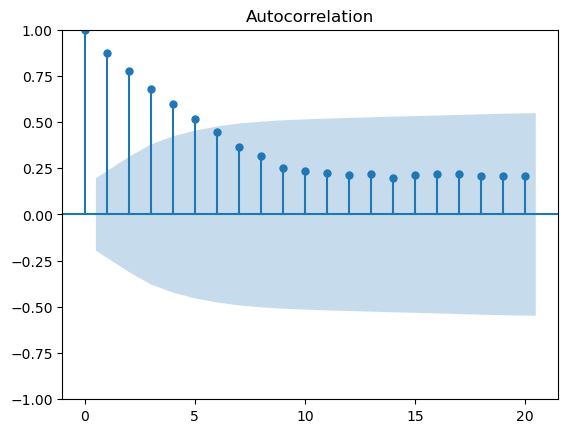

In [37]:
# ACF for ARMR
plot_acf(simulated_data)
plt.show()

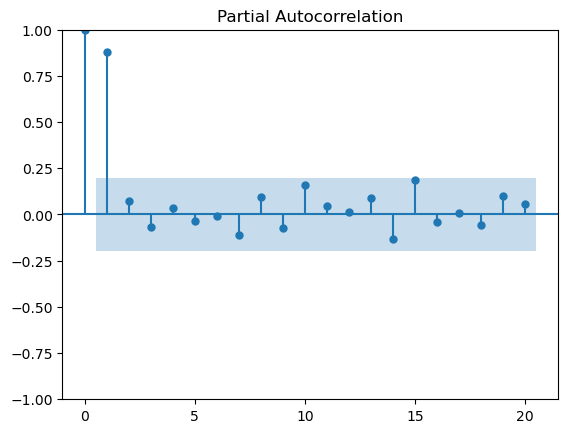

In [38]:
# PACF for ARMR
plot_pacf(simulated_data)
plt.show()

#### 4. Write the equation of an ARMA model

$X_t = c + \phi_1X_{t-1} + \phi_2X_{t-2} + ... + \phi_pX_{t-p} + \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + ... + \theta_q\varepsilon_{t-q}$

#### 5. What are the main differences between AIC and BIC criteria, conceptually speaking ?
The main difference between AIC and BIC is the degree to which they penalize complexity in the model. BIC tends to favor simpler models by imposing a greater penalty for additional model parameters, while AIC is less strict in this regard. In cases where AIC and BIC suggest different models, we must decide which metric to use based on our goals. For the purpose of finding a good predictive model, AIC is preferred, while BIC is better suited for identifying a good explanatory model.

#### 6. Explain the Box-Jenkins method
Box-Jenkins method is a kind of checklist to go from raw data to a model ready for production. 
* Identification : explore and characterize the data to find some form of it which is appropriate to ARIMA modeling. (Whether the time series is stationary? Which transformations? Identify which orders p and q)
* Estimation: Choose between model using AIC and BIC
* Model diagnostics: Are residuals uncorrelated & normally distributed

## Forecasting competition on Kaggle

In [39]:
df_train = pd.read_csv('Kaggle dataset/sales_train.csv')
df_test = pd.read_csv('Kaggle dataset/test.csv')
df_sam = pd.read_csv('Kaggle dataset/sample_submission.csv')
df_items = pd.read_csv('Kaggle dataset/items.csv')
df_cate = pd.read_csv('Kaggle dataset/item_categories.csv')
df_shop = pd.read_csv('Kaggle dataset/shops.csv')

In [40]:
df_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [41]:
df_test.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [42]:
df_sam.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [43]:
df_items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [44]:
df_cate.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [45]:
df_shop.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

In [46]:
df_train['date'] = pd.to_datetime(df_train['date'], format = "%d.%m.%Y")
dfX = df_train[df_train['item_id'] == 20949].sort_values(by='date')
dfX = dfX[["date","item_cnt_day"]]
dfX.head()

date  item_cnt_day
352455 2013-04-24           2.0
404113 2013-04-24           2.0
406541 2013-04-24           2.0
362755 2013-04-24           1.0
365123 2013-04-24           1.0

#### Choose from the sales list the item, whose id is 20949.

In [47]:
df_train['date'] = pd.to_datetime(df_train['date'], format = "%d.%m.%Y")
df_train = df_train.set_index("date")
df_train = df_train[df_train['item_id'] == 20949].sort_values(by='date').reset_index()
df_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-04-24               3       22    20949         5.0           2.0
1 2013-04-24               3       59    20949         5.0           2.0
2 2013-04-24               3       54    20949         5.0           2.0
3 2013-04-24               3       25    20949         5.0           1.0
4 2013-04-24               3       26    20949         5.0           1.0

In [48]:
#df_train[df_train.item_id==20949]['date'].min()

In [49]:
df_train = df_train[["date","item_cnt_day"]]

In [50]:
df_train.isnull().sum()

date            0
item_cnt_day    0
dtype: int64

####  Use the diff function to the time series, and explain in a few words what it does. Upload the required packages when need be (astsa, etc.). You can use the fpp2 package for seasonal data (or its Python equivalent).

<AxesSubplot:xlabel='Date', ylabel='Sales'>

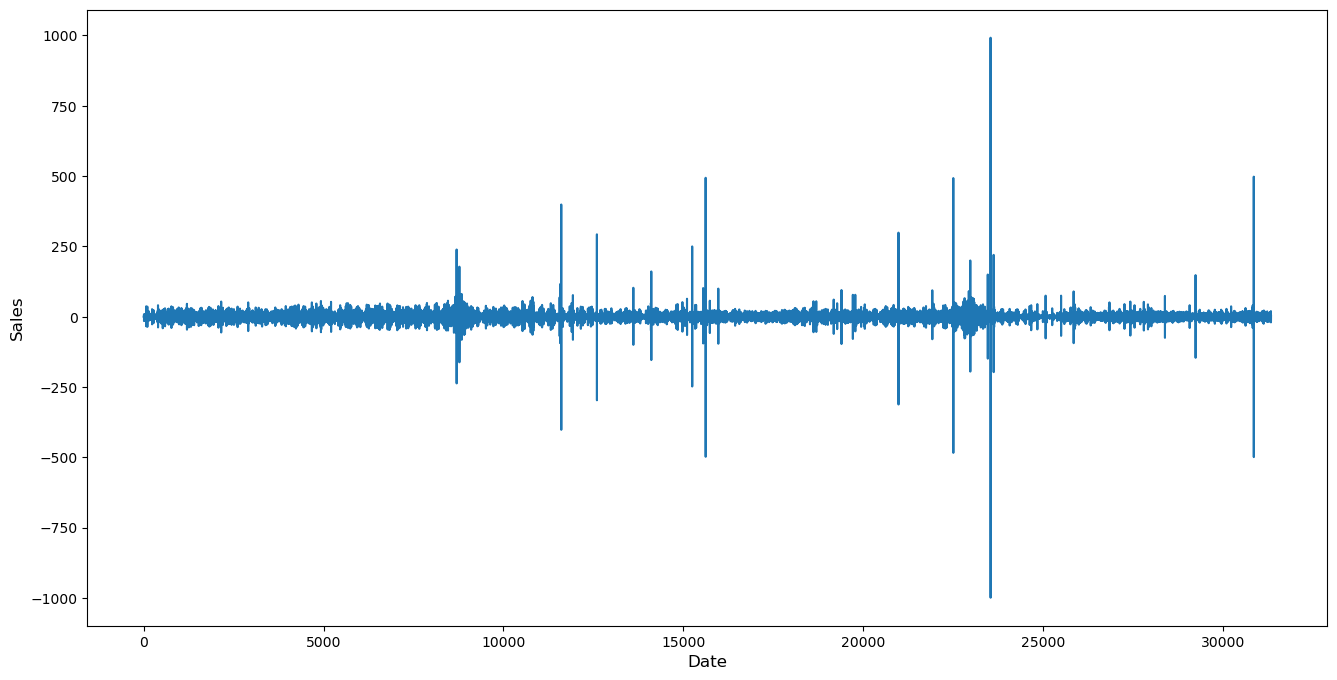

In [51]:
plt.figure(figsize=(16,8))
df_train_diff = df_train["item_cnt_day"].diff()
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
df_train_diff.plot()

In [52]:
# Convert date column to be of data type datetime64
df_train = df_train.groupby(["date"]).sum().reset_index("date")
df_train = df_train.set_index('date')
df_train.head()

item_cnt_day
date                    
2013-04-24           8.0
2013-04-25          25.0
2013-04-26          43.0
2013-04-27          38.0
2013-04-28          38.0

#### 1. Fit and plot an auto-regressive model to the time series.

In [53]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

In [54]:
model = sm.tsa.arima.ARIMA(df_train['item_cnt_day'], order=(1,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5541.908
Date:                Wed, 25 Jan 2023   AIC                          11089.816
Time:                        22:33:59   BIC                          11104.292
Sample:                    04-24-2013   HQIC                         11095.340
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.7371     13.302     15.316      0.000     177.666     229.808
ar.L1          0.6462      0.013     49.451      0.000       0.621       0.672
sigma2      9844.9144    176.276     55.849      0.000    9499.420    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   5.11   Jarque-Bera (JB):             14169.40
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             2.03
Prob(H) (two-sided):                  0.07   Kurtosis:                        21.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

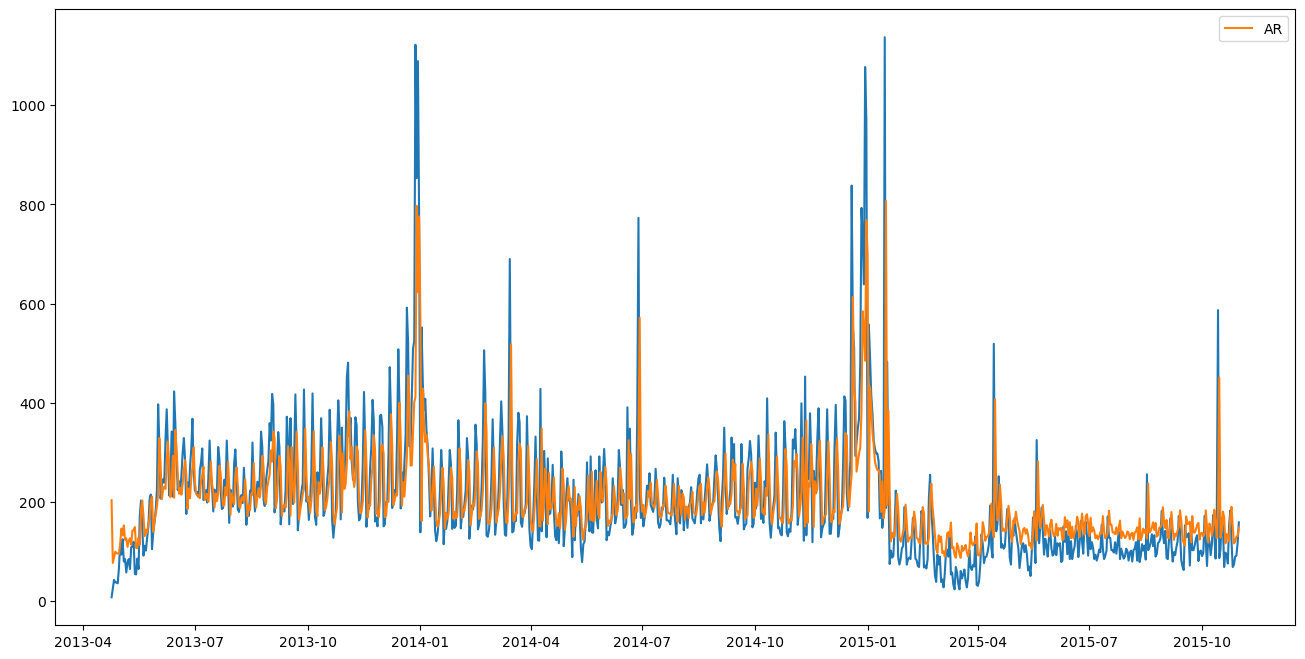

In [55]:
plt.figure(figsize=(16,8))
plt.plot(df_train['item_cnt_day'])
plt.plot(model_fit.predict(), label='AR')
plt.legend()
plt.show()

#### 2. What are the intercept and the innovation variance (sigma2) estimate ? What do these parameters mean ?
* Intercept is the value that the model predicts for the time series when all of the independent variables, and it represents the average value of the time series when there is no dependence on past values.
* Innovation variance (sigma2) estimate is a measure of the variation or "noise" in the residuals of the model. 

#### 3. Predict the sales for two years after the ending date of the training dataset, and add confidence intervals


In [56]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df_train['item_cnt_day'])
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])

ADF Statistic: -3.8733499374603335
p-value: 0.002239970222764163


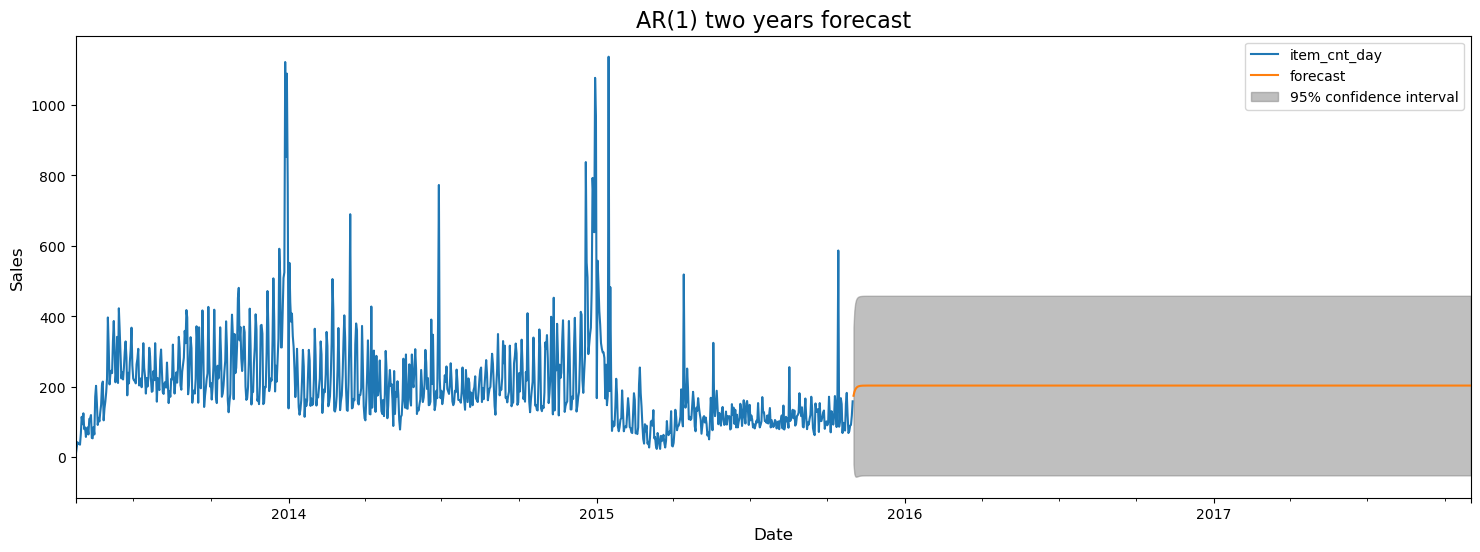

In [57]:
fig, ax = plt.subplots(figsize=(18,6))
ar1 = ARIMA(df_train, order=(1,0,0)).fit()
ax = df_train.plot(ax=ax)
plt.title("AR(1) two years forecast", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plot_predict(ar1, '2015-11-1', '2017-11-1', ax=ax)
plt.show()

In [58]:
# Forecast the next 60 steps
predictions = ar1.forecast(steps = 730)
predictions.head()

2015-11-01    174.826920
2015-11-02    185.054655
2015-11-03    191.664063
2015-11-04    195.935220
2015-11-05    198.695344
Freq: D, Name: predicted_mean, dtype: float64

#### 4. Fit and plot a moving average model, and print the estimates

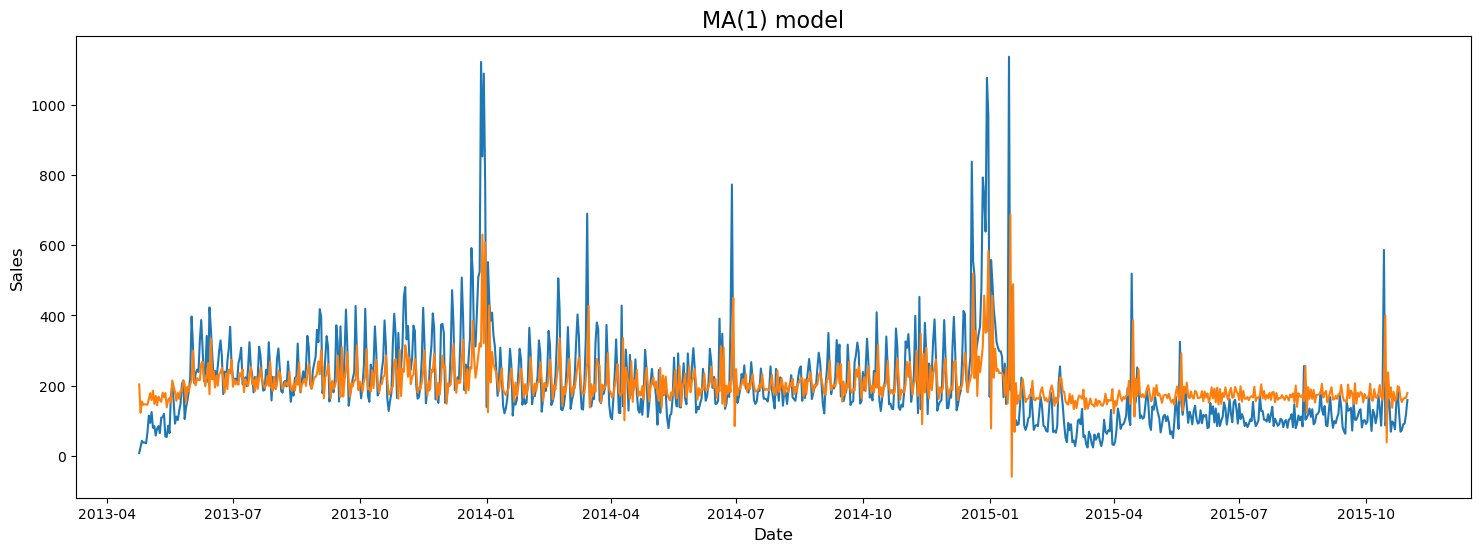

In [59]:
ma1 = ARIMA(df_train, order=(0,0,1)).fit()
fig, ax = plt.subplots(figsize=(18,6))
plt.title("MA(1) model", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.plot(df_train['item_cnt_day'])
plt.plot(ma1.predict(), label='AR')
plt.show()

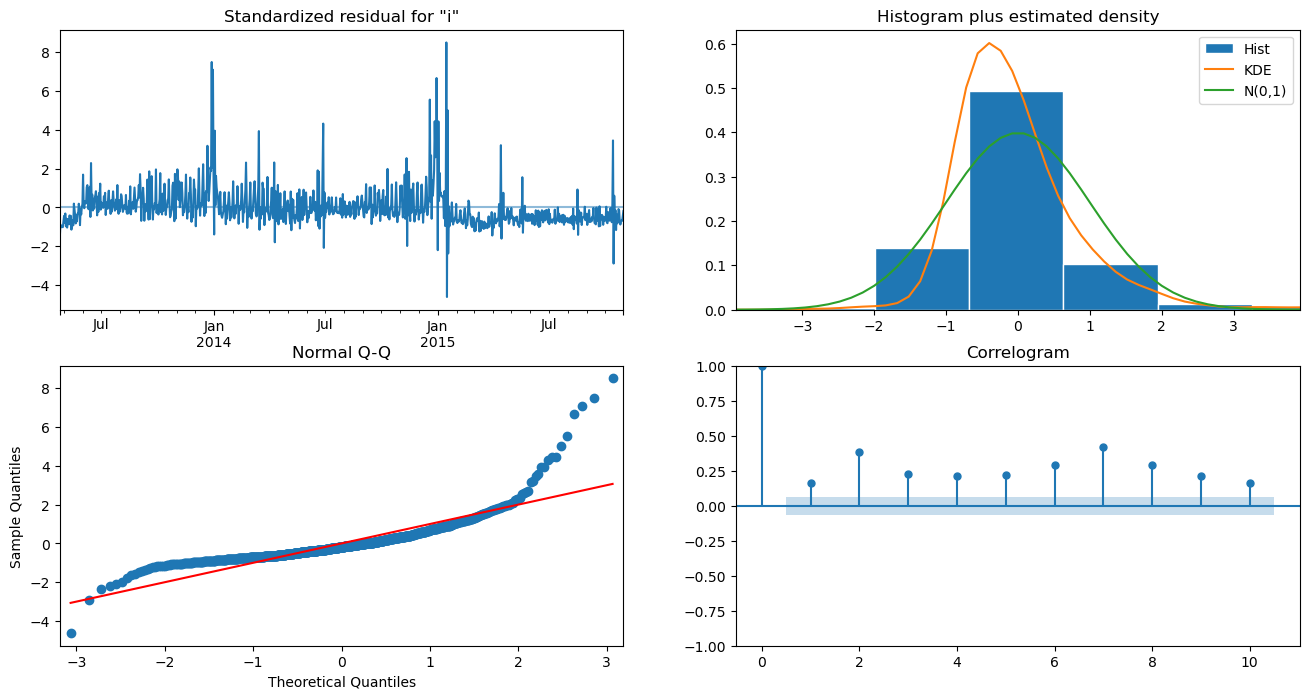

In [60]:
ma1.plot_diagnostics(figsize=(16,8))
plt.show()

In [61]:
# Print the model parameters
print(ma1.params)

const       203.717867
ma.L1         0.526136
sigma2    11712.944791
dtype: float64


#### 5. Make a two years forecast, and plot the 95 percent confidence intervals

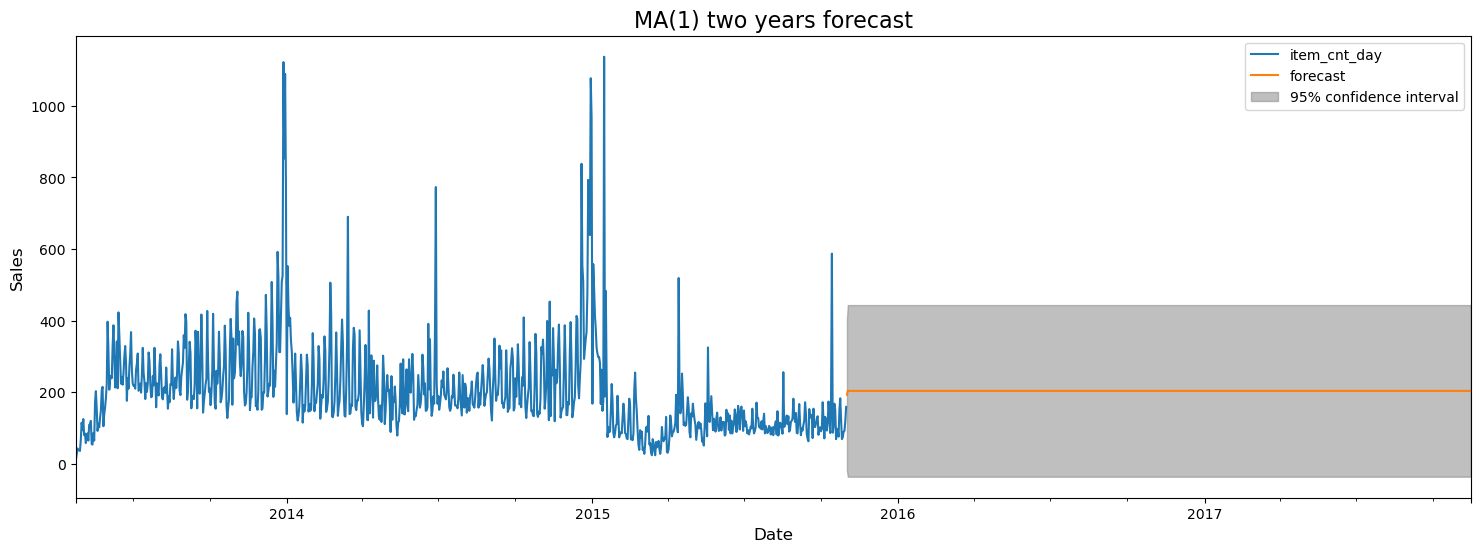

In [62]:
fig, ax = plt.subplots(figsize=(18,6))
ax = df_train.plot(ax=ax)
plot_predict(ma1, '2015-11-1', '2017-11-15', ax=ax)
plt.title("MA(1) two years forecast", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

#### 6. Compare the goodness of fit of AR and MA models through AIC and BIC criteria

In [63]:
print(f"AR Model:\n AIC:{ar1.aic} \n BIC:{ar1.bic}")
print(f"MA Model:\n AIC:{ma1.aic} \n BIC:{ma1.bic}")

AR Model:
 AIC:11089.815944383481 
 BIC:11104.292324492248
MA Model:
 AIC:11248.372958967255 
 BIC:11262.849339076021


#### 7. What model performs the best according to you ?
AR is perform better according to AIC and BIC scores (both smaller than MA)

#### 8. Make the ACF plots for various lags

<Figure size 640x480 with 0 Axes>

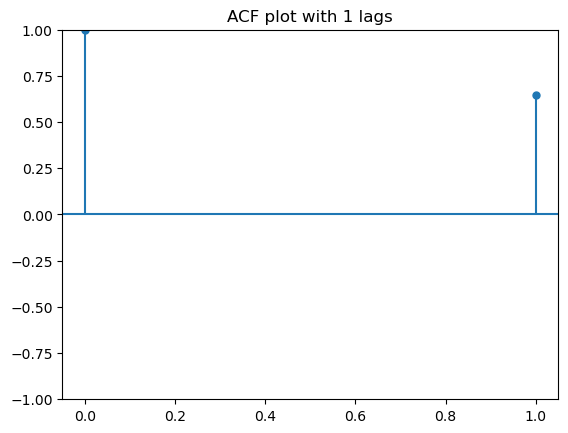

<Figure size 640x480 with 0 Axes>

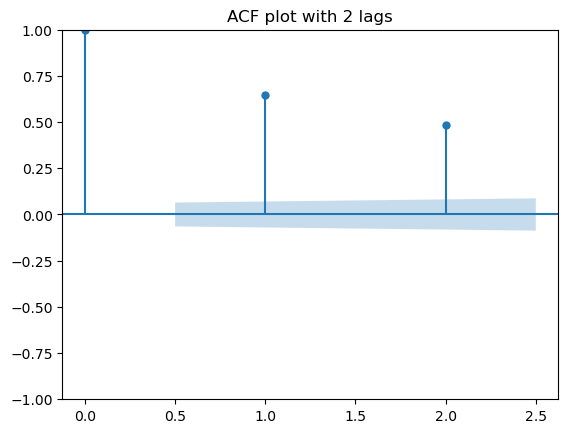

<Figure size 640x480 with 0 Axes>

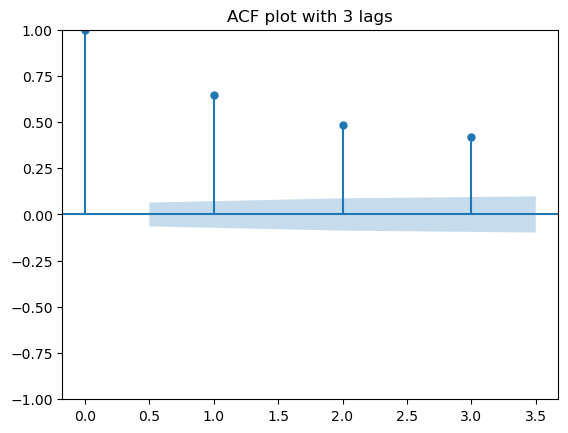

<Figure size 640x480 with 0 Axes>

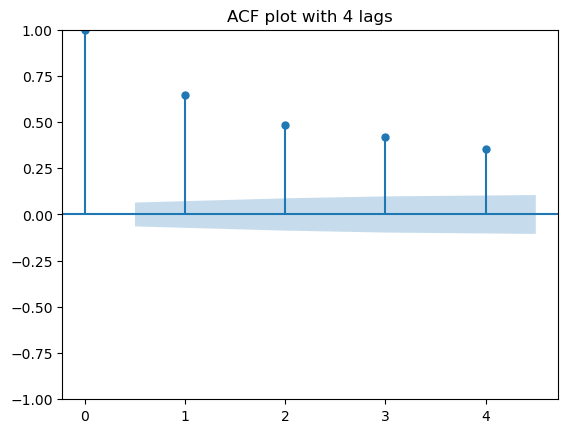

<Figure size 640x480 with 0 Axes>

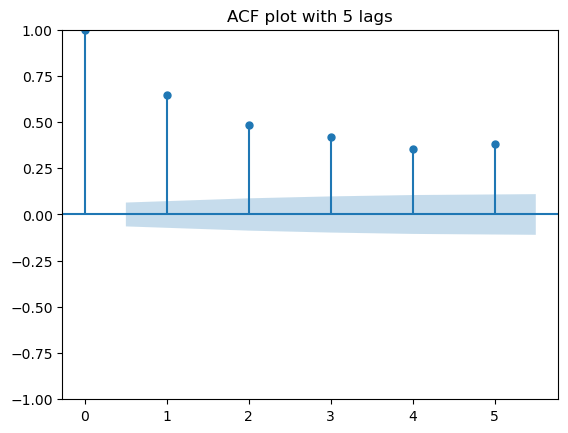

<Figure size 640x480 with 0 Axes>

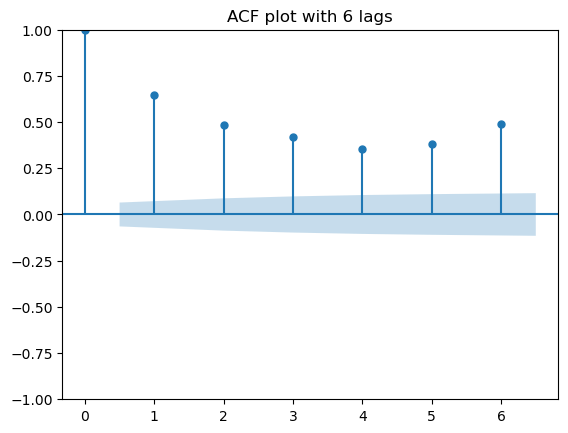

<Figure size 640x480 with 0 Axes>

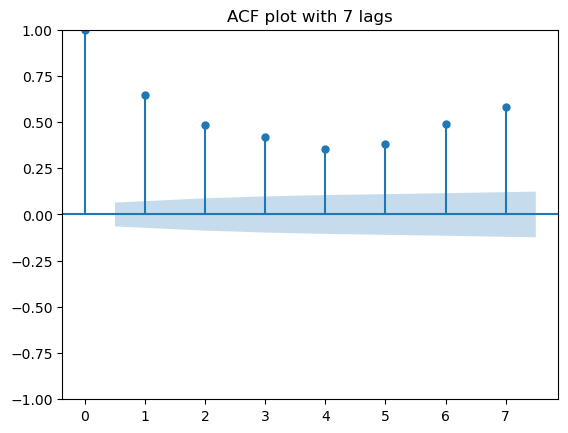

<Figure size 640x480 with 0 Axes>

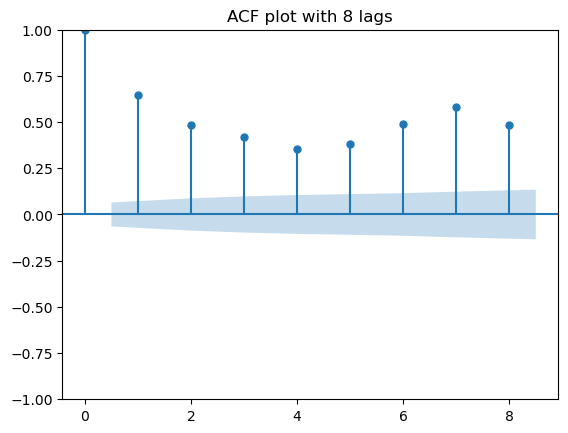

<Figure size 640x480 with 0 Axes>

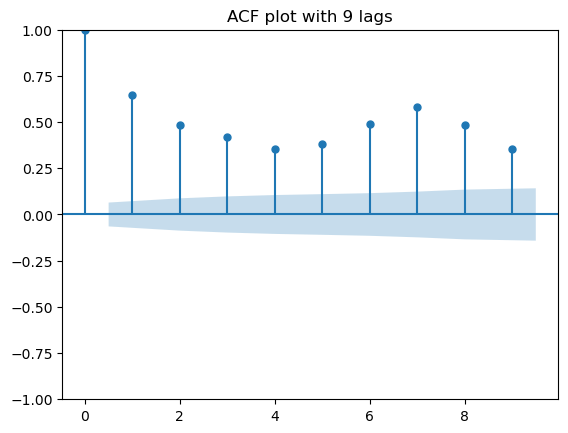

<Figure size 640x480 with 0 Axes>

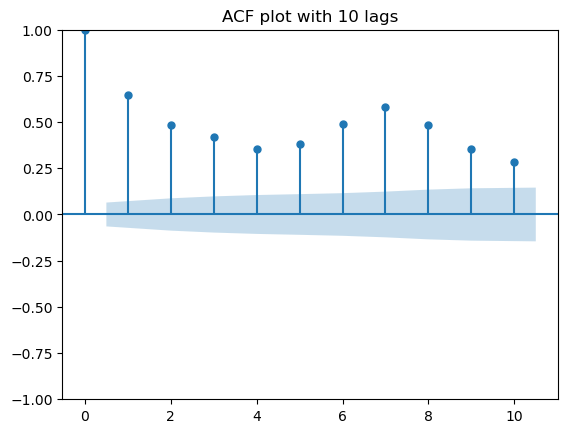

<Figure size 640x480 with 0 Axes>

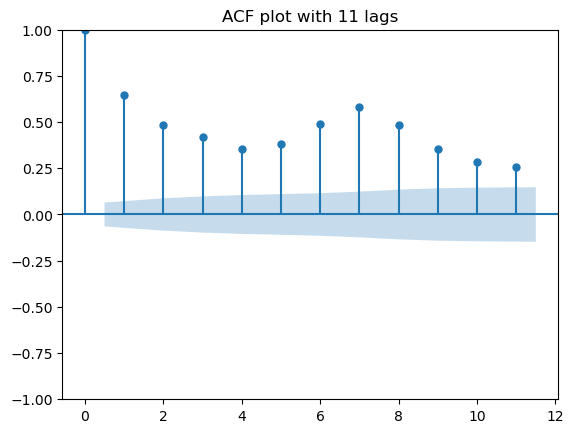

<Figure size 640x480 with 0 Axes>

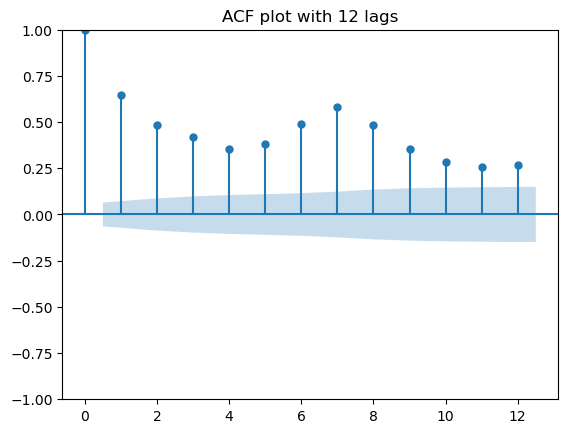

<Figure size 640x480 with 0 Axes>

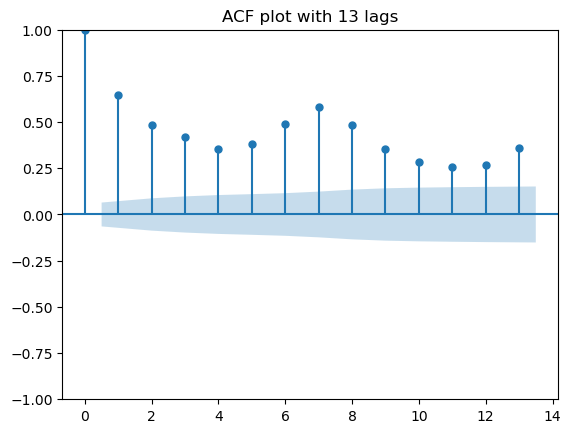

<Figure size 640x480 with 0 Axes>

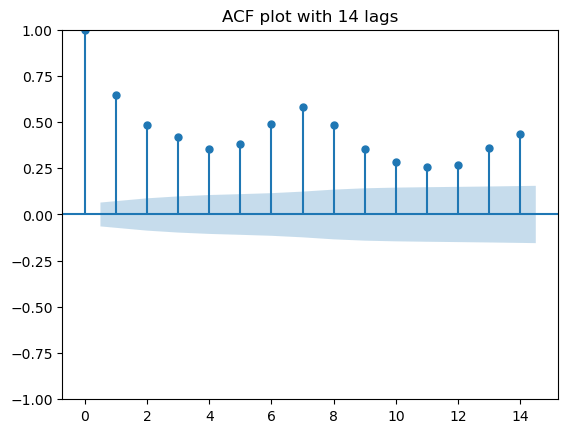

<Figure size 640x480 with 0 Axes>

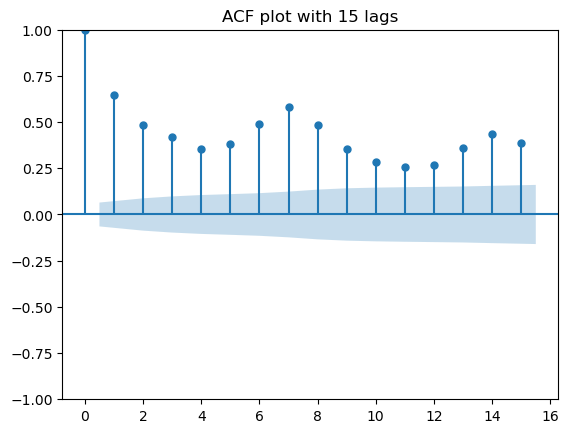

<Figure size 640x480 with 0 Axes>

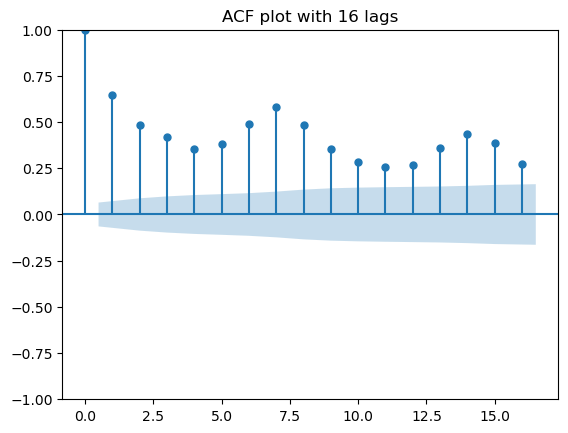

<Figure size 640x480 with 0 Axes>

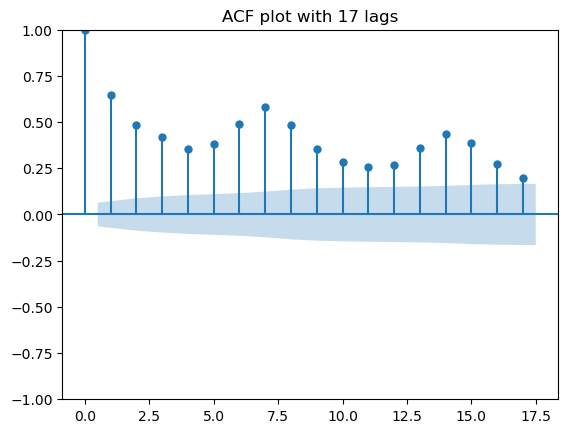

<Figure size 640x480 with 0 Axes>

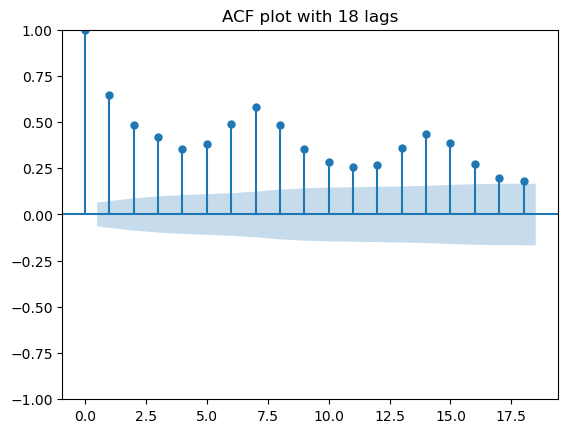

<Figure size 640x480 with 0 Axes>

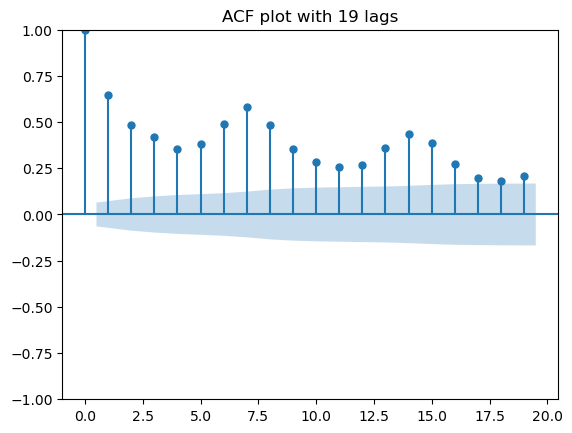

In [64]:
# Plot the ACF for different lags
for i in range(1, 20):
    plt.figure()
    plot_acf(df_train, lags=i)
    plt.title(f'ACF plot with {i} lags')
plt.show()

#### 9. Use the residual analysis graphics of the Sarima function to check whether there are patterns in the residuals

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA model
sar = SARIMAX(df_train, order=(1,0,1))
sar = model.fit()

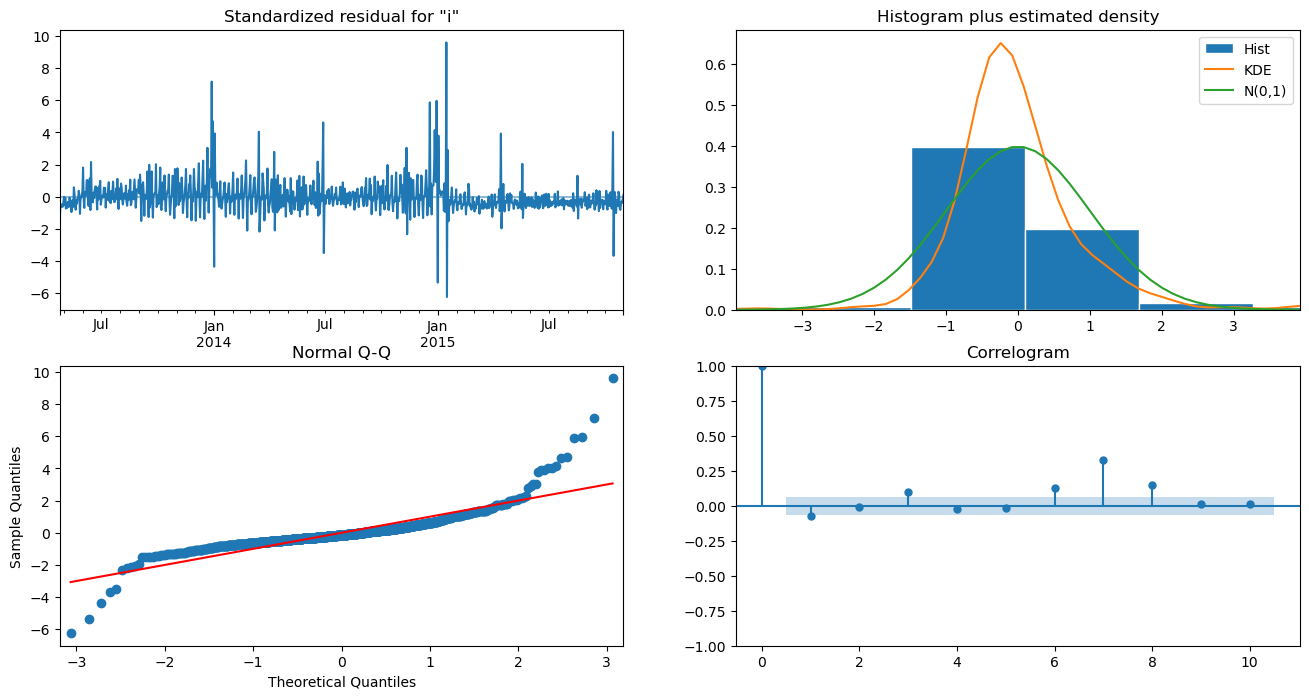

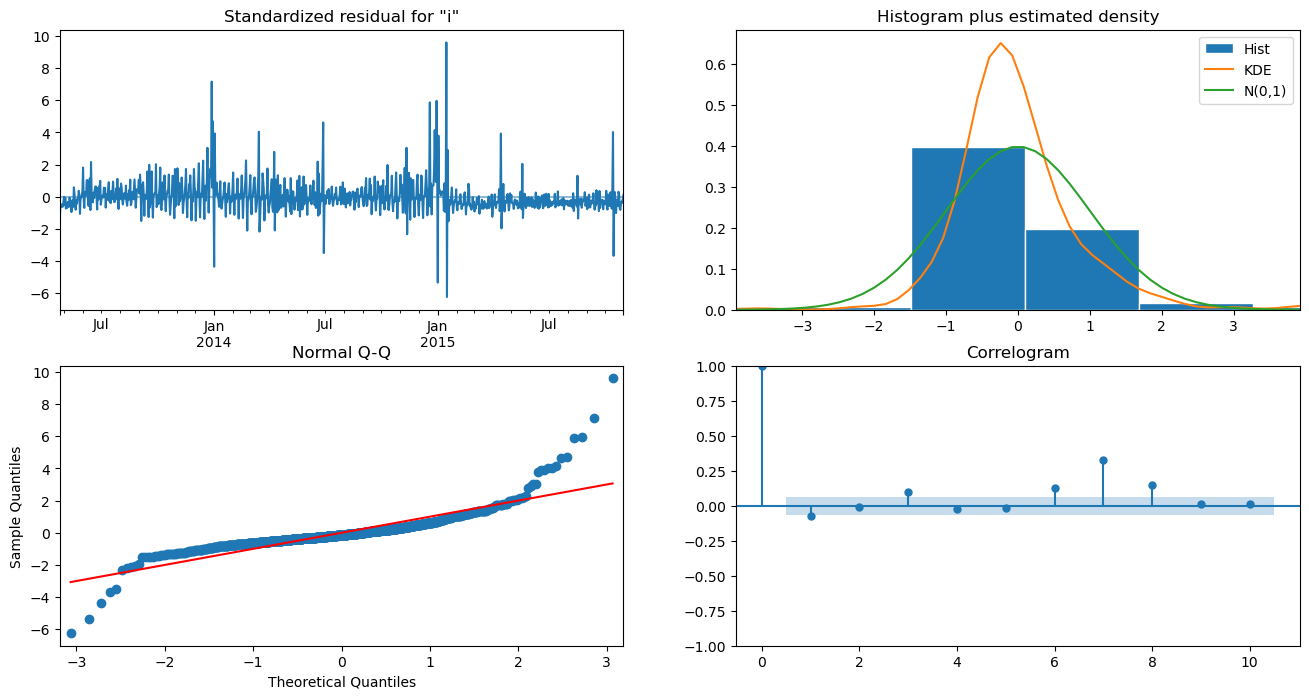

In [66]:
# Plot the residuals
sar.plot_diagnostics(figsize=(16,8))

#### 11. How should Q-Q plot look like when the model is a good fit ?
When the model is a good fit, the Q-Q plot should display the residuals in a roughly straight line.

#### 12. Fit various models (for instance ARMA(1,1)- ARMA(2,1)- ARIMA(1,1,1) - ARIMA(1,1,0) to the Kaggle time series, and plot the t-table, check di- agnostics (including residuals). You can choose different orders for the AR and the MA.

##### ARMA(1,1)

In [67]:
arma11 = ARIMA(df_train,order=(1,0,1));
arma11fit = arma11.fit();

In [68]:
arma11fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5531.608
Date:                Wed, 25 Jan 2023   AIC                          11071.216
Time:                        22:34:03   BIC                          11090.518
Sample:                    04-24-2013   HQIC                         11078.582
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.6957     17.317     11.763      0.000     169.755     237.637
ar.L1          0.8212      0.014     58.854      0.000       0.794       0.849
ma.L1         -0.3245      0.023    -13.879      0.000      -0.370      -0.279
sigma2      9638.1682    171.035     56.352      0.000    9302.946    9973.390
===================================================================================
Ljung-Box (L1) (Q):                   1.77   Jarque-Bera (JB):             13757.65
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.95
Prob(H) (two-sided):                  0.79   Kurtosis:                        21.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

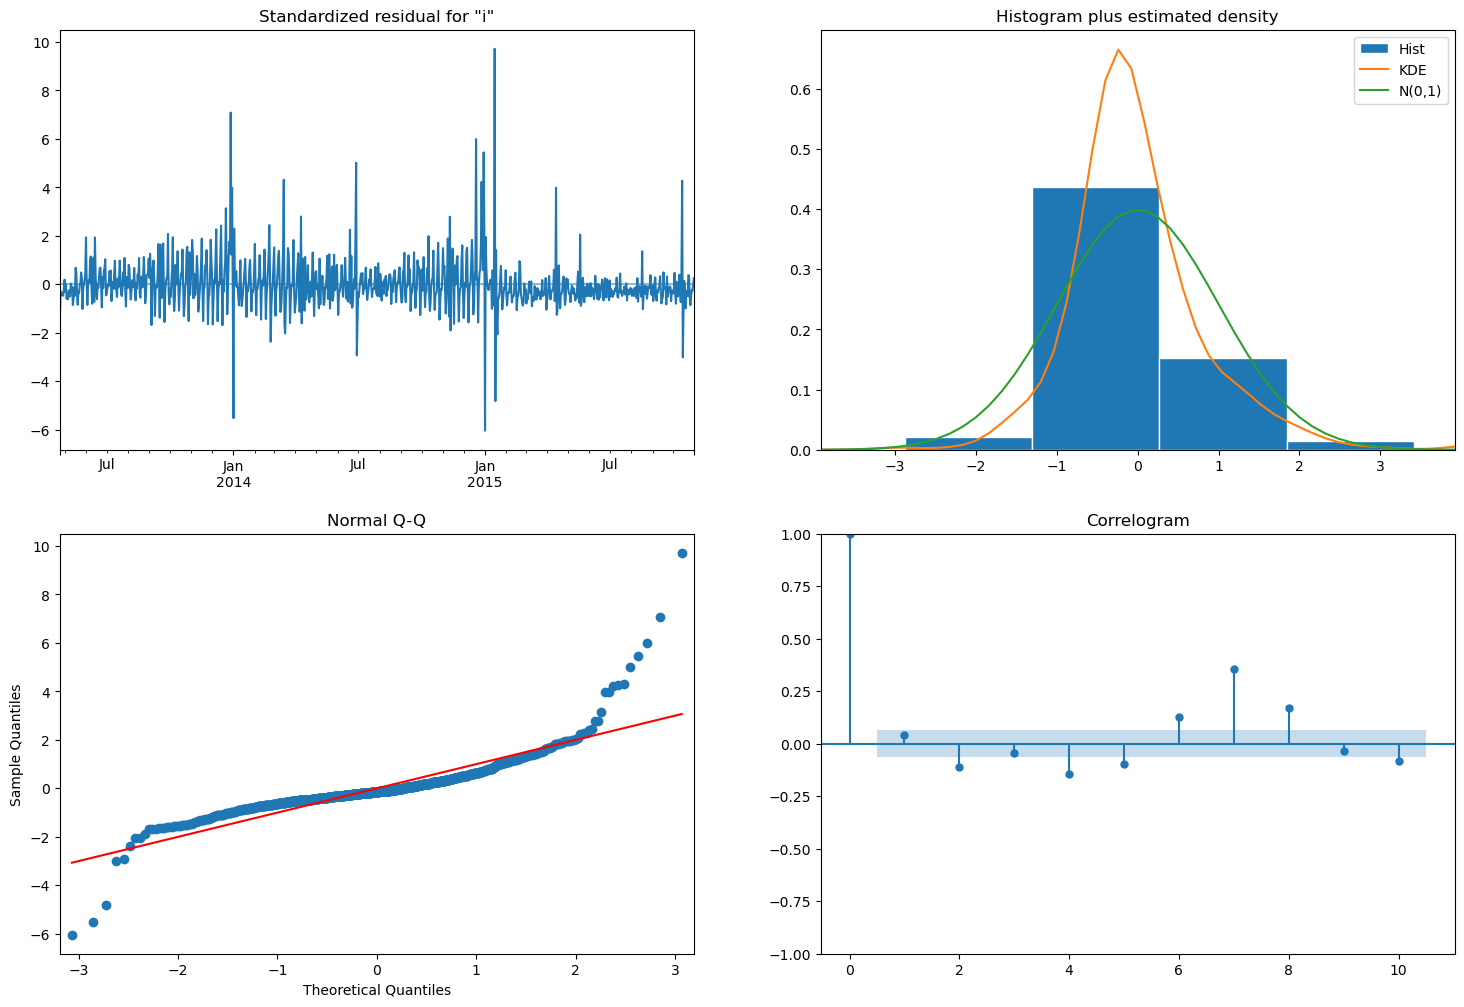

In [69]:
arma11fit.plot_diagnostics(figsize=(18, 12)) 
plt.show()

##### ARMA(2,1)

In [70]:
arma21 = ARIMA(df_train['item_cnt_day'],order=(2,0,1));
arma21fit = arma21.fit();

In [71]:
arma21fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -5501.980
Date:                Wed, 25 Jan 2023   AIC                          11013.959
Time:                        22:34:04   BIC                          11038.086
Sample:                    04-24-2013   HQIC                         11023.166
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.6541     35.532      5.732      0.000     134.013     273.296
ar.L1          1.3318      0.024     56.442      0.000       1.286       1.378
ar.L2         -0.3479      0.021    -16.390      0.000      -0.390      -0.306
ma.L1         -0.8624      0.017    -51.311      0.000      -0.895      -0.829
sigma2      9035.3532    166.721     54.194      0.000    8708.585    9362.121
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):             13975.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             2.08
Prob(H) (two-sided):                  0.69   Kurtosis:                        21.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

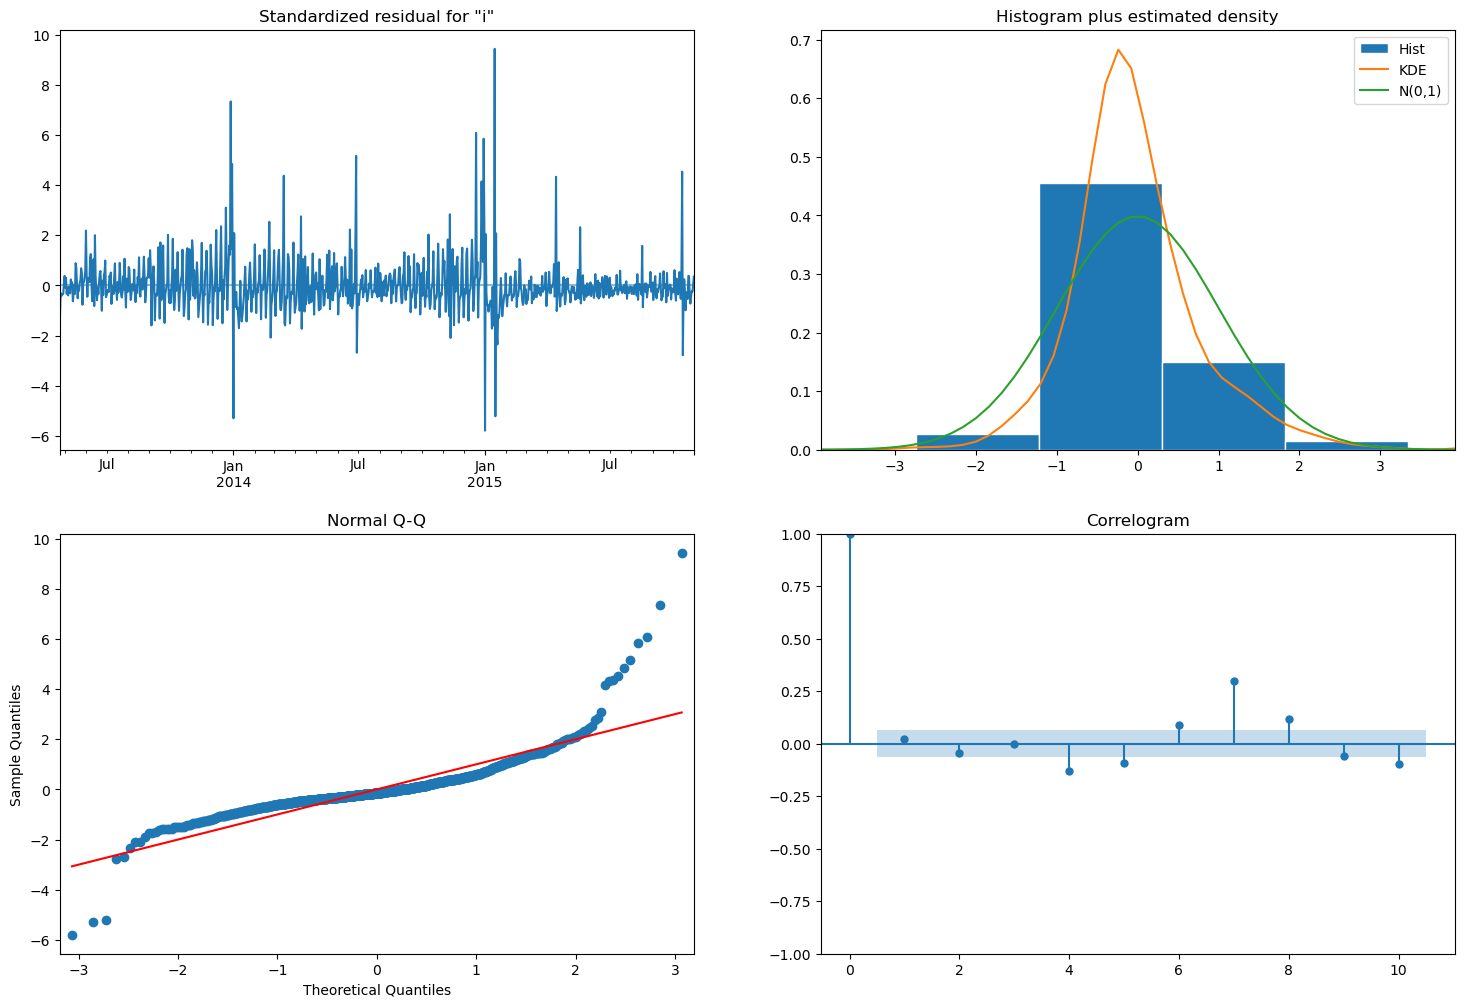

In [72]:
arma21fit.plot_diagnostics(figsize=(18, 12)) 
plt.show()

##### ARIMA(1,1,1)

In [73]:
arima111 = ARIMA(df_train['item_cnt_day'],order=(1,1,1));
arima111fit = arima111.fit();

In [74]:
arima111fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5500.631
Date:                Wed, 25 Jan 2023   AIC                          11007.261
Time:                        22:34:04   BIC                          11021.734
Sample:                    04-24-2013   HQIC                         11012.784
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3725      0.019     19.225      0.000       0.334       0.410
ma.L1         -0.8904      0.009    -98.381      0.000      -0.908      -0.873
sigma2      9127.2032    141.248     64.618      0.000    8850.362    9404.044
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):             12144.48
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             1.72
Prob(H) (two-sided):                  0.63   Kurtosis:                        20.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

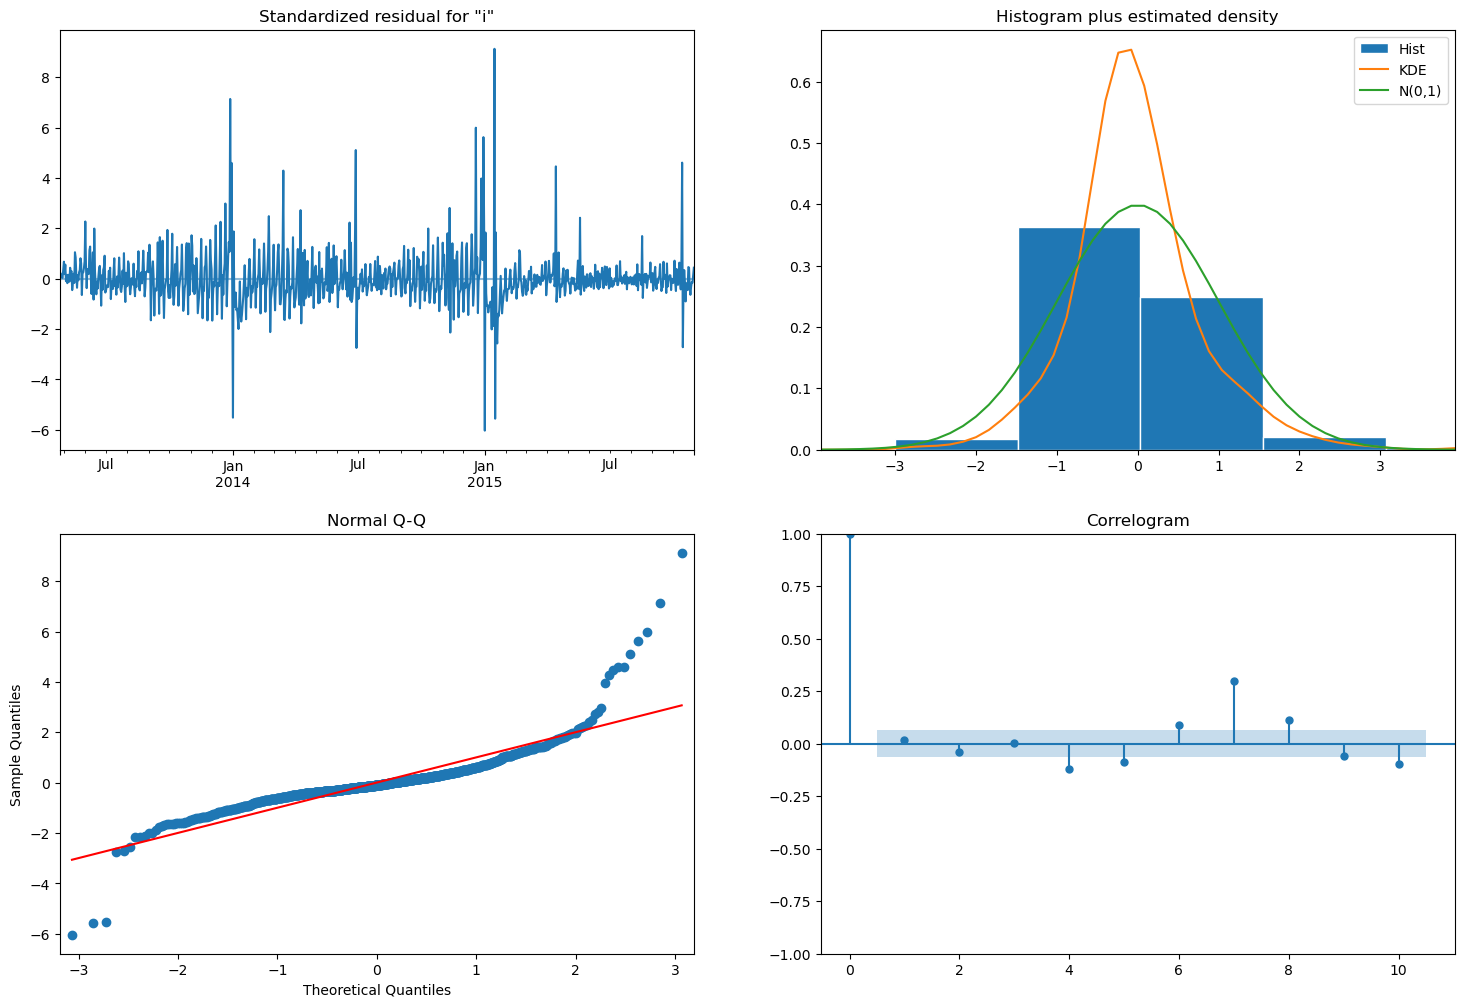

In [75]:
arima111fit.plot_diagnostics(figsize=(18, 12)) 
plt.show()

#### 13. Fit a seasonal model to the Kaggle dataset. Fit ACF models with the rel- evant lags. Example : SARIMA(2,1,0,1,0,0,12).


In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
sm.tsa.statespace.SARIMAX

statsmodels.tsa.statespace.sarimax.SARIMAX

In [77]:
ss = sm.tsa.statespace.SARIMAX(df_train['item_cnt_day'], order=(2,1,0), seasonal_order=(1,0,0,12))
ss_fit = ss.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.03279D+00    |proj g|=  2.22216D-02

At iterate    5    f=  6.03241D+00    |proj g|=  6.20867D-04

At iterate   10    f=  6.03233D+00    |proj g|=  3.59797D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   8.354D-06   6.032D+00
  F =   6.0323100353025723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [78]:
ss_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       item_cnt_day   No. Observations:                  921
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -5555.758
Date:                            Wed, 25 Jan 2023   AIC                          11119.515
Time:                                    22:34:05   BIC                          11138.813
Sample:                                04-24-2013   HQIC                         11126.879
                                     - 10-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3495      0.014    -24.466      0.000      -0.378      -0.322
ar.L2         -0.2334      0.017    -13.599      0.000      -0.267      -0.200
ar.S.L12      -0.1324      0.030     -4.477      0.000      -0.190      -0.074
sigma2      1.029e+04    179.235     57.438      0.000    9943.696    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):             11783.38
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.50
Prob(H) (two-sided):                  0.56   Kurtosis:                        20.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

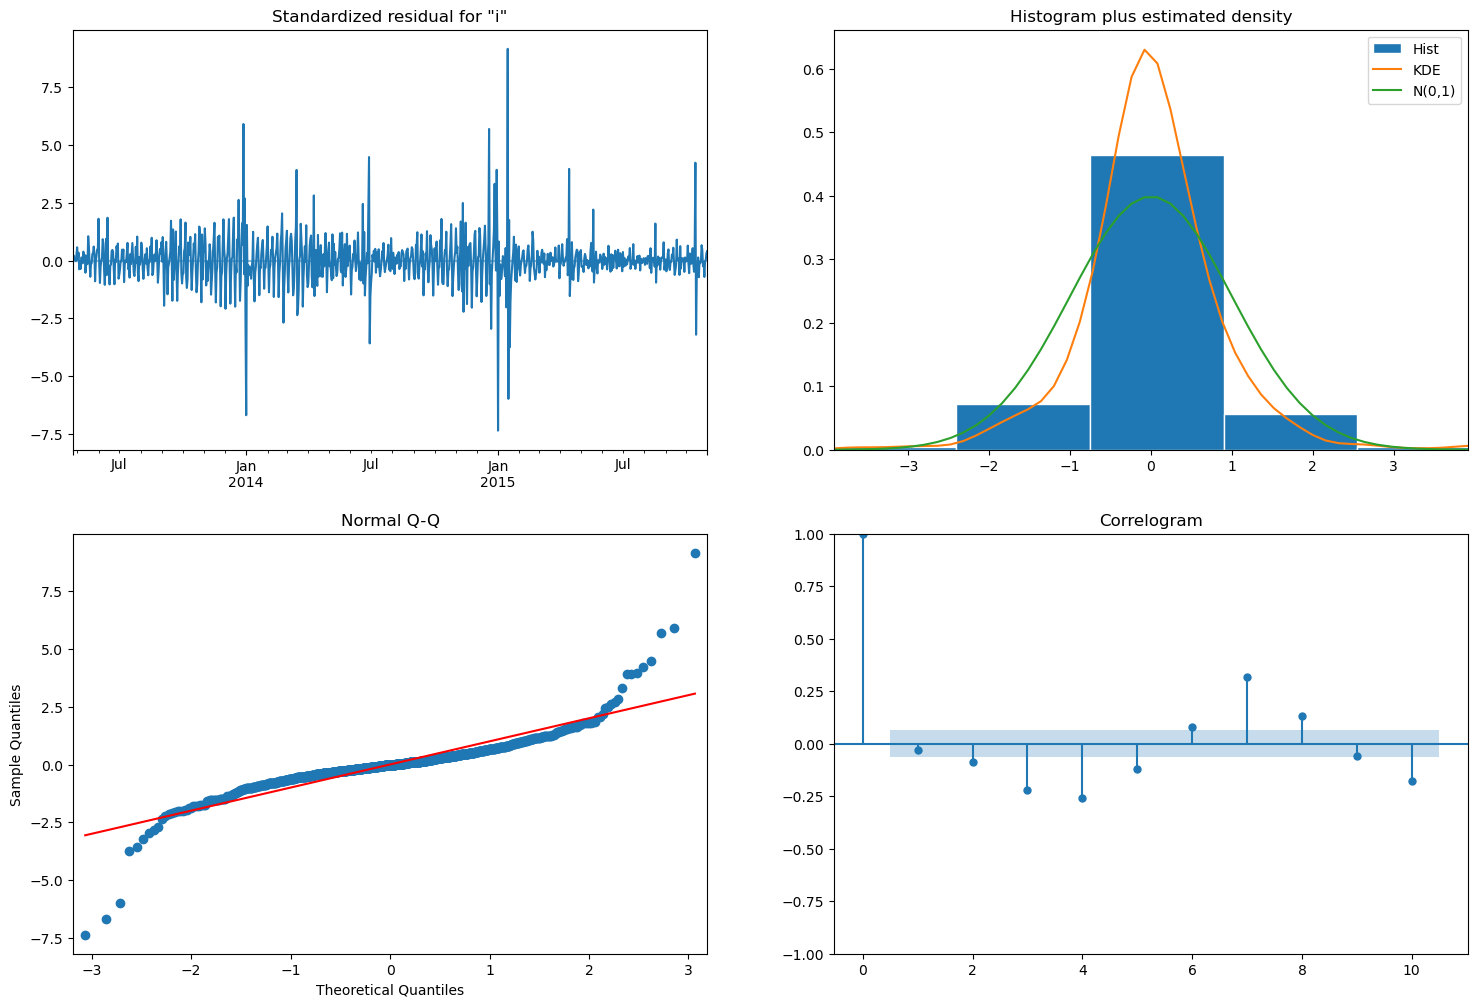

In [79]:
ss_fit.plot_diagnostics(figsize=(18, 12)) 
plt.show()

####  What are the conceptual differences between an ARIMA and a SARIMA, from the mathematical point of view ? Then, play with the parameters of the seasonnal component of the model (increase them), and see how forecasting is affected.

The main conceptual difference between ARIMA and SARIMA is that ARIMA models the non-seasonal component of the time series while SARIMA models both the non-seasonal and seasonal component of the time series.

In [80]:
sar212 = SARIMAX(df_train["item_cnt_day"], order=(2, 1, 2), seasonal_order=(1, 2, 3, 4))
sar212 = sar212.fit()
print(sar212.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75521D+00    |proj g|=  1.87192D-01



 This problem is unconstrained.


At iterate    5    f=  6.56915D+00    |proj g|=  2.21149D-02

At iterate   10    f=  6.55069D+00    |proj g|=  3.54710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     13     26      1     0     0   5.792D-02   6.283D+00
  F =   6.2832979274920451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                                         SARIMAX Results                                         
Dep. Variable:                              item_cnt_day   No. Observations:                  921
Model:             SARIMAX(2, 1, 2)x(1, 2, [1, 2, 3], 4)   Log Likelihood               -5786.917
Date:                                   Wed, 25 Jan 2023   AIC                          11591.835
Time:                                           22:34:08   BIC                          11635.176
Sample:                                       04-24-2013   HQIC                         11608.381
                                            - 10-31-2015                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6980      3.174     -0.220      0.826    

In [81]:
predictions = sar212.forecast(steps = 10)
predictions

2015-11-01    116.025069
2015-11-02    105.351951
2015-11-03    120.196546
2015-11-04    111.021143
2015-11-05     99.667691
2015-11-06     98.434242
2015-11-07    116.170637
2015-11-08    108.148688
2015-11-09     97.235439
2015-11-10     96.157754
Freq: D, Name: predicted_mean, dtype: float64

#### 14. Present a relevant sample of Ljung-Box tests, and explain how they can be used to assess your models

In [82]:
acorr_ljungbox(sar212.resid, lags = range(1, 10), return_df = True)

lb_stat     lb_pvalue
1   34.983888  3.324448e-09
2   43.670044  3.289808e-10
3   53.017679  1.817519e-11
4   53.161391  7.884167e-11
5   53.510543  2.641948e-10
6   85.405424  2.720582e-16
7  208.354766  1.948233e-41
8  243.361300  4.395711e-48
9  243.903335  1.930264e-47

#### 15. Use your favourite model to forecast the time series on the available test datasets

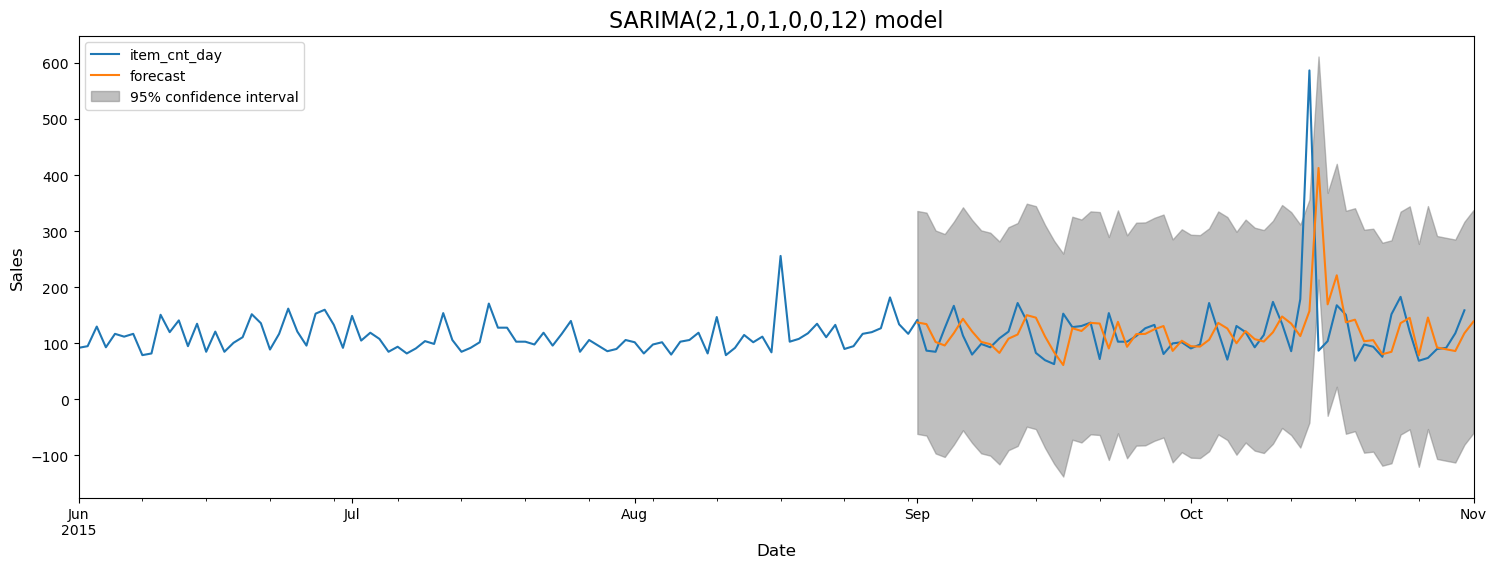

In [83]:
fig, ax = plt.subplots(figsize=(18,6))
ax = df_train['2015-06-01':].plot(ax=ax)
plt.title("SARIMA(2,1,0,1,0,0,12) model", fontsize = 16)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plot_predict(ss_fit, '2015-9-1', '2015-11-1', ax=ax)
plt.show()

#### 16. Perform a naive forecast based on the forecast package, to predict the sales for the training datasets

In [84]:
train, test = np.split(df_train, [int(.7 *len(df_train))])

In [85]:
train_array = np.asarray(train)
train_index = train.index
test_index = test.index
y = train_array[len(train_array)-1]
y = [y[0]]*len(test_index)

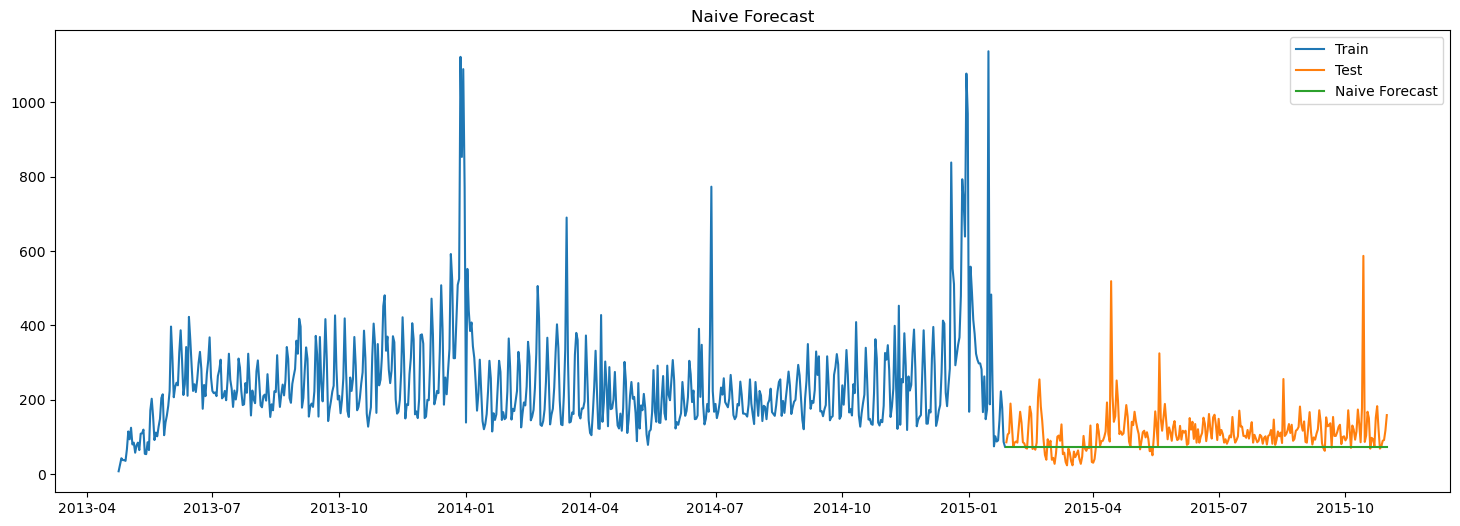

In [86]:
plt.figure(figsize=(18,6))
plt.plot(train_index, train.item_cnt_day, label = 'Train')
plt.plot(test_index, test.item_cnt_day, label = 'Test')
plt.plot(test_index, y, label = 'Naive Forecast')
plt.legend(loc = 'upper right')
plt.title("Naive Forecast")
plt.show()

#### 17. Remind us to what correspond the two shades of blue in the confidence intervals

The two shades of blue in the confidence intervals represent the upper and lower limits of the forecasted values, where the upper limit is represented by the lighter shade and the lower limit is represented by the darker shade.
These limits are calculated based on the uncertainty of the forecast and are shown as a range around the forecasted values, the width of the range is determined by the level of confidence specified.

#### 16. Use the accuracy command to compute the RMSE statistics of your favourite models. What does RMSE mean ? What is the difference with MAE ? Why is it usually preferred to MSE ?

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test.item_cnt_day, y))
print(rmse)

67.85578783153481


Root Mean Squared Error (RMSE) is a measure of the difference between the predicted values and the actual values. It is calculated by taking the square root of the average of the squared differences between the predicted values and the actual values. Unlike RMSE, MAE is calculated by taking the absolute value of the differences between the predicted values and the actual values, and then taking the average of these absolute values. The difference between MAE and RMSE is that MAE is more robust to outliers. MAE is usually preferred to MSE, because it is less sensitive to outliers, more interpretable, and not affected by the scale of the data.

#### 19. Write a command that only returns the mean absolute percentage error

In [88]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test.item_cnt_day, y)
print("MAPE:", mape)

MAPE: 0.3677165610941385


#### 20. Compute cross-validated errors for up to a week ahead, with a naive forecast approach

#### 21. Use Auto-ARIMA to fit a model to your data. What orders did the algorithm choose ? Are they consistant with your previous work ? Explain how auto-ARIMA work in 150 words maximum.

In [89]:
#pip install pmdarima

In [90]:
from pmdarima import auto_arima

In [91]:
# convert date column to timestamp
y = df_train['item_cnt_day']
# fit the model
model = auto_arima(y, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                  start_P=0, seasonal=True, d=1, D=1, trace=True,
                  error_action='ignore', suppress_warnings=True, 
                  stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11838.783, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11515.678, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11791.602, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11315.219, Time=1.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=11389.336, Time=0.67 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=11260.111, Time=1.25 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=11494.062, Time=0.40 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=7.71 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.54 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=11251.954, Time=1.48 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

Auto-ARIMA is a process that automates the selection of the best parameters for an ARIMA model, which is a type of time series forecasting model that uses a combination of Autoregression, Integration, and Moving Average. It uses statistical tests and heuristics to determine the best values of p, d, and q, the parameters of the ARIMA model. 

## Forecasting with Prophet

### Car data set

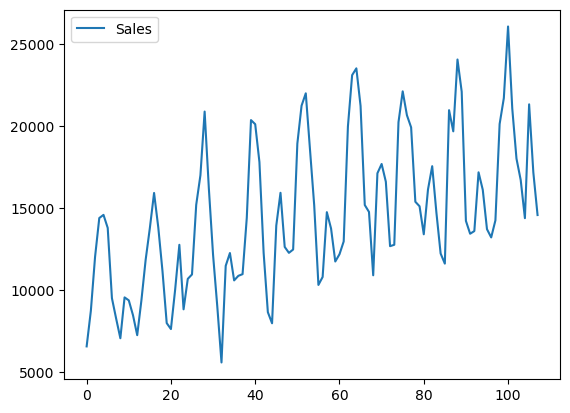

In [92]:
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
df.plot();
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [93]:
from prophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

22:35:27 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15402.026282  13618.195372  17053.814322
1 1969-02-01  16160.816555  14537.663791  17777.420559
2 1969-03-01  21367.885535  19814.666424  22904.539663
3 1969-04-01  23502.093201  22050.493124  24978.217294
4 1969-05-01  25016.996626  23566.504464  26552.726098


In [94]:
df.tail()

ds      y
103 1968-08-01  16722
104 1968-09-01  14385
105 1968-10-01  21342
106 1968-11-01  17180
107 1968-12-01  14577

In [95]:
#conda install -c conda-forge prophet -y

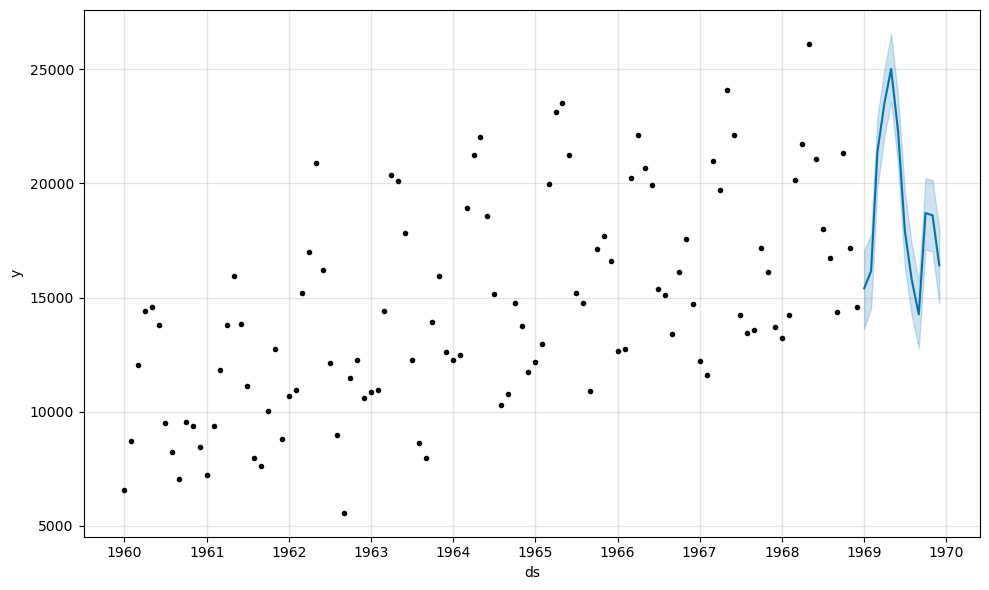

In [96]:
# plot forecast
model.plot(forecast)
pyplot.show()

MAE: 1372.113


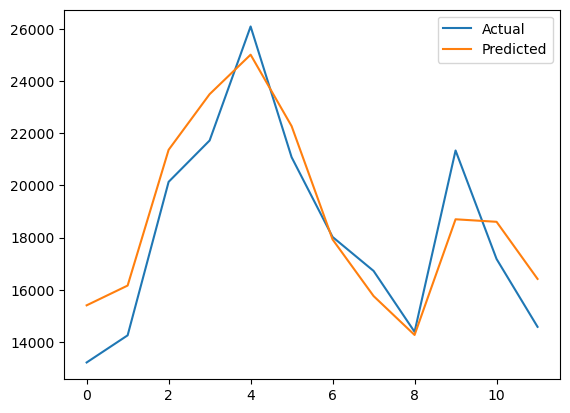

In [97]:
from sklearn.metrics import mean_absolute_error
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

### Weather data set

In [98]:
df = pd.read_csv('weather-complete.csv')
df.head()

date  temperature
0  2012-10-01    11.036840
1  2012-10-02    14.340558
2  2012-10-03    14.518382
3  2012-10-04    16.820351
4  2012-10-05    16.948431

In [99]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [100]:
prophet_basic = Prophet()
prophet_basic.fit(df)
future = prophet_basic.make_future_dataframe(periods=300)
future = future.tail(300)

22:35:27 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing


In [101]:
forecast = prophet_basic.predict(future)

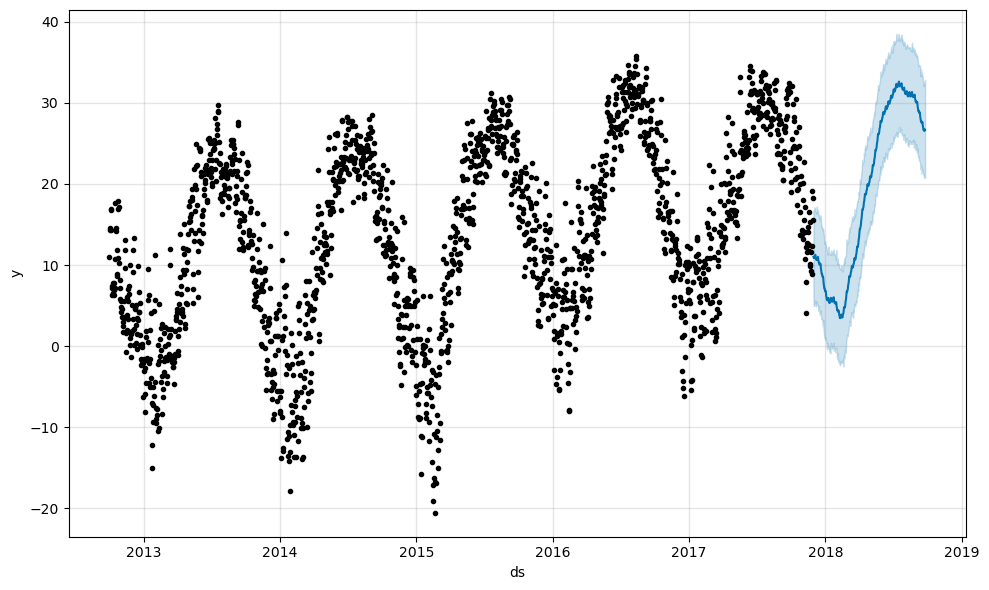

In [102]:
fig1 = prophet_basic.plot(forecast)

## Fourier Transform

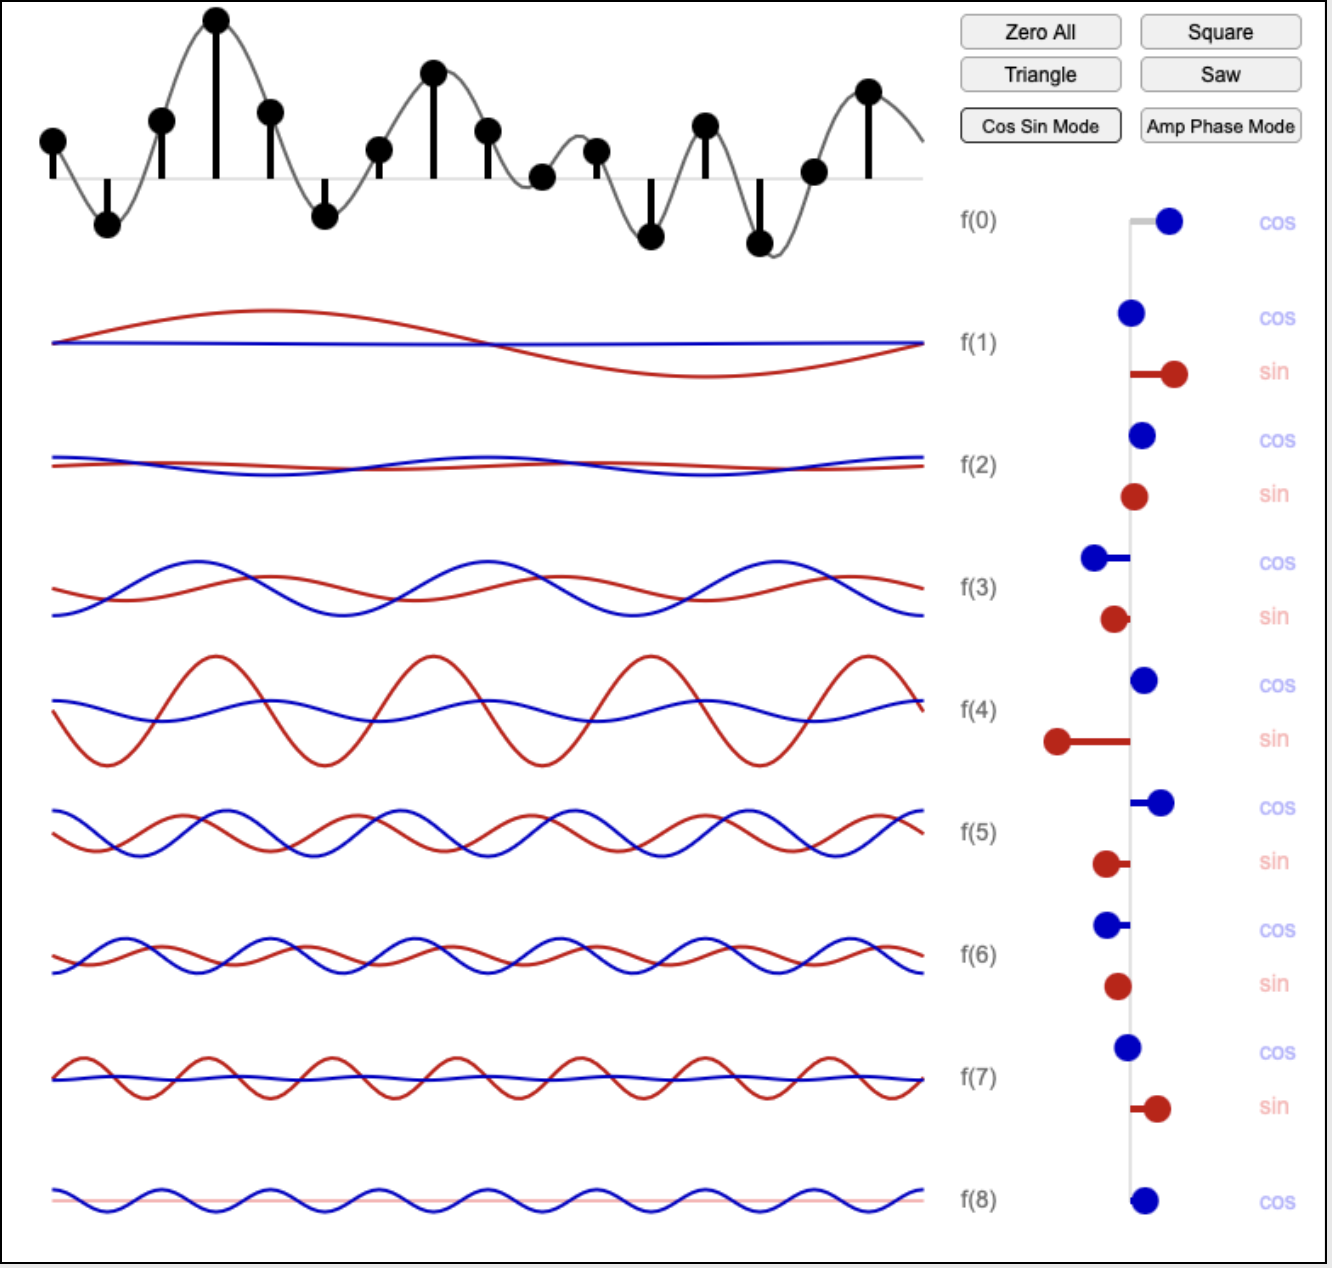

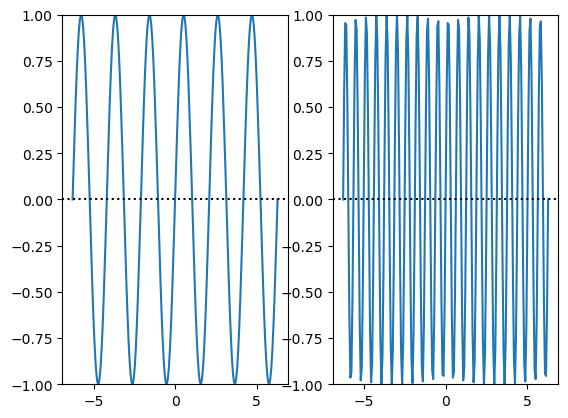

In [103]:
# Complex Wave
xs = np.linspace(-2*np.pi, 2*np.pi, num=int(2*np.pi/(np.pi/100)))
wave_1 = np.sin(3*xs)
wave_2 = np.sin(10*xs)

fig, ax = plt.subplots(1, 2)
ax[0].plot(xs, wave_1)
ax[0].set_ylim([-1, 1])
ax[0].axhline(y=0, linestyle='dotted', color='black')
ax[1].plot(xs, wave_2)
ax[1].set_ylim([-1, 1])
ax[1].axhline(y=0, linestyle='dotted', color='black')
plt.show()

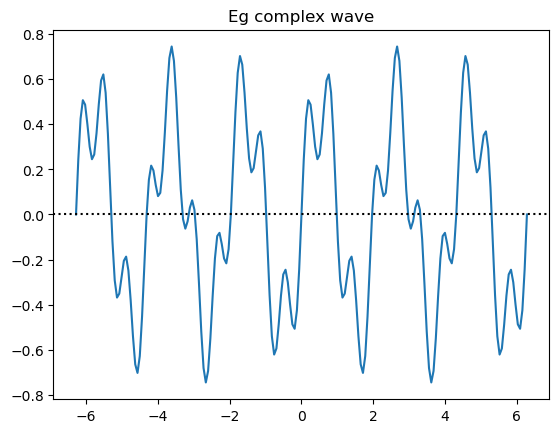

In [104]:
wave_3 = 0.5 * wave_1 + 0.25 * wave_2

plt.plot(xs, wave_3)
plt.title("Eg complex wave")
plt.axhline(y=0, linestyle='dotted', color='black')
plt.show()

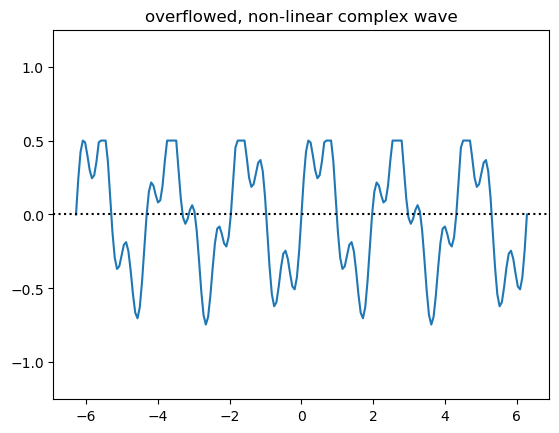

In [105]:
# Fourier Series
wave_4 = wave_3.copy()
wave_4[wave_3 > 0.5] = 0.5

plt.plot(xs, wave_4)
plt.ylim([-1.25, 1.25])
plt.title("overflowed, non-linear complex wave")
plt.axhline(y=0, linestyle='dotted', color='black')
plt.show()

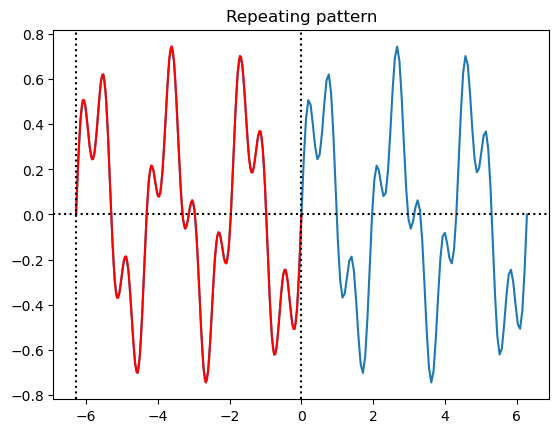

In [106]:
repeat_xs = np.linspace(-2*np.pi, 0, num=int(2*np.pi/(np.pi/100)))
wave_3_repeat = 0.5*np.sin(3*repeat_xs) + 0.25*np.sin(10*repeat_xs)

plt.plot(xs, wave_3)
plt.title("Repeating pattern")
plt.plot(repeat_xs, wave_3_repeat, color='red', linestyle='-')
plt.axhline(y=0, linestyle='dotted', color='black')
plt.axvline(x=-2*np.pi, linestyle='dotted', color='black')
plt.axvline(x=0, linestyle='dotted', color='black')
plt.show()

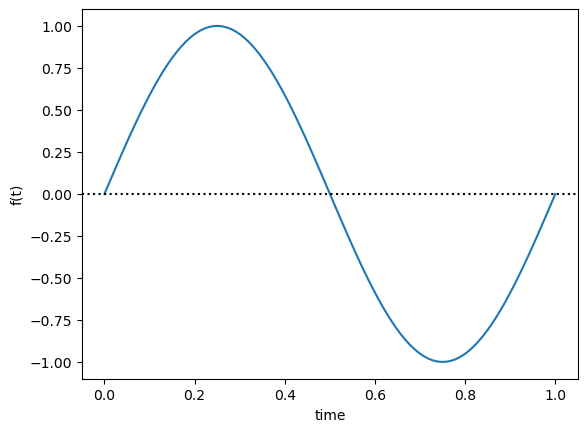

In [107]:
import math

def plot_fourier(fourier_series, f_0, ts):
    w = 2*math.pi*f_0
    trajectory = [fourier_series(t,w) for t in ts]
    plt.plot(ts, trajectory)
    plt.xlabel("time")
    plt.ylabel("f(t)")
    plt.axhline(y=0, linestyle='dotted', color='black')
    plt.show()

# An example
ts = np.linspace(0, 1, num=int(1*100))
plot_fourier(lambda t,w: math.sin(w*t), 1, ts)

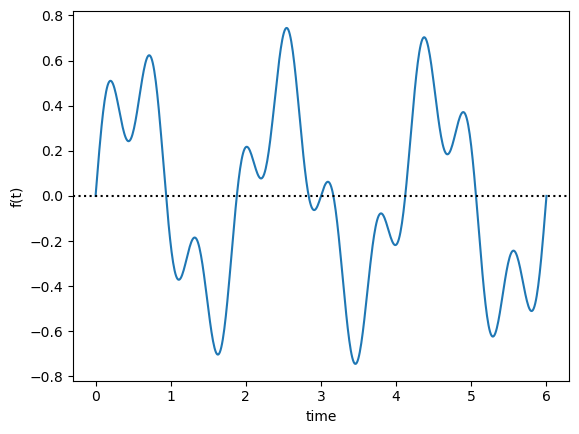

In [108]:
acq_freq = 100 # data acquisition frequency (Hz)
time = 6 # measuring time interval (seconds)
ts = np.linspace(0, time, num=int(time*acq_freq)) # vector of sampling time-points (s) 
f_0 = 1/time # fundamental frequency (Hz)

dc_component = 0
component_freqs = [3,10] # frequency of signal components (Hz)
component_delay = [0,0] # delay of signal components (radians)
component_strength = [0.5,0.25] # strength of signal components

def f(t,w):
    return dc_component + sum(component_strength[i] * math.sin(component_freqs[i]*w*t + component_delay[i]) for i in range(len(component_freqs)))

plot_fourier(f,f_0,ts)

#### Examples

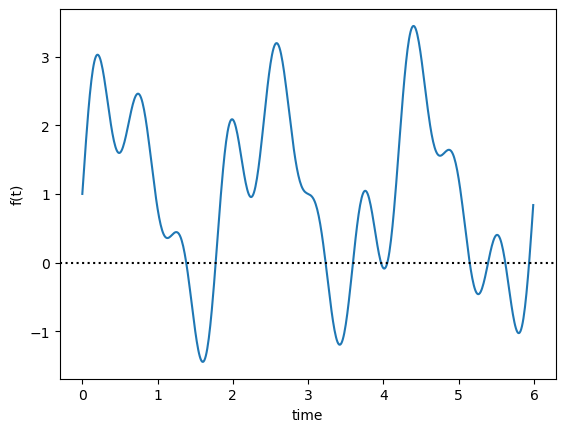

In [109]:
import numpy as np

acq_freq = 100 # data acquisition (sample) frequency (Hz)
time = 6 # measuring time interval (seconds)
ts = np.arange(0, time, 1/acq_freq) # vector of sampling time-points (s) 
f_0 = 1/time

dc_component = 1
component_freqs = [3, 7, 10] # frequency of signal components (Hz)
component_delay = [0, 0, 0] # delay of signal components (radians)
component_strength = [1.5, 0.5, 0.75] # strength of signal components

def f(t, w):
    return dc_component + np.sum(np.array(component_strength) * np.sin(np.array(component_freqs)*w*t + component_delay))

plot_fourier(f, f_0, ts)


In [110]:
import numpy as np

w = 2*np.pi*f_0

def trajectory_f(t):
    return f(t, w)

trajectory = np.array([trajectory_f(t) for t in ts])
print(trajectory[:30])

[1.         1.16213158 1.32316106 1.48199684 1.63756823 1.78883567
 1.93480056 2.07451469 2.20708922 2.33170293 2.44760985 2.55414609
 2.65073584 2.73689643 2.81224249 2.87648901 2.92945351 2.97105703
 3.00132416 3.02038196 3.02845788 3.02587661 3.01305602 2.99050214
 2.95880322 2.91862308 2.87069361 2.81580666 2.75480542 2.68857521]


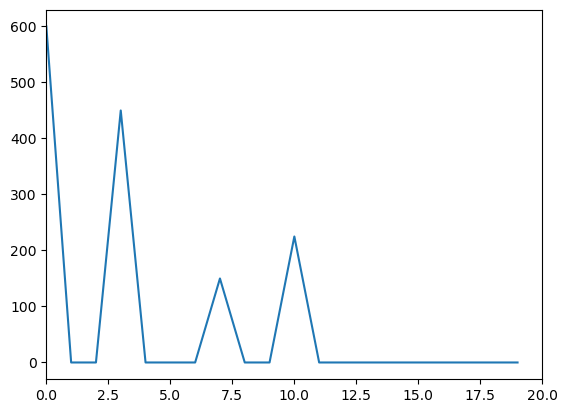

In [111]:
X_k = np.fft.fft(trajectory) # find all harmonics with fft()
plt.plot(abs(X_k[:20]))
plt.xlim(0,20)
plt.show()

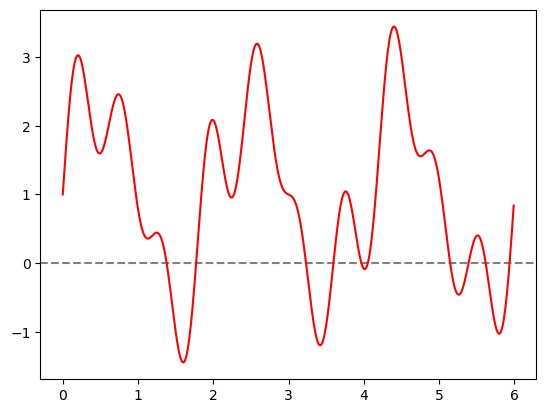

In [112]:
x_n = np.fft.ifft(X_k) / acq_freq  #  get the original trajectory from the frequency domain
#plt.plot(ts,x_n.real)
plt.axhline(y=0, linestyle='--', color='gray')  # abline(h=0,lty=3)
plt.plot(ts,trajectory,'r') # compare with original
plt.show()

In [113]:
def plot_show(trajectory, time=1, harmonics=-1, plot_freq=False):
    acq_freq = len(trajectory) / time  # data acquisition frequency (Hz)
    ts = np.arange(0, time, 1/acq_freq) # vector of sampling time-points (s) 

    X_k = np.fft.fft(trajectory)
    x_n = np.fft.ifft(X_k) / acq_freq

    if plot_freq:
        plt.plot(abs(X_k))
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.show()

    max_y = np.ceil(1.5*np.max(np.abs(x_n)))
    if harmonics[0] == -1:
        min_y = np.floor(np.min(np.abs(x_n))) - 1
    else:
        min_y = np.ceil(-1.5*np.max(np.abs(x_n)))
    plt.plot(ts, x_n.real)
    plt.ylim(min_y, max_y)
    plt.axhline(y=min_y, xmin=0, xmax=time, linestyle='--', color='gray')
    plt.axvline(x=0, ymin=min_y, ymax=max_y, linestyle='--', color='gray')
    plt.plot(ts, trajectory, 'ro')  # the data points we know

    if harmonics[0] > -1:
        for i in range(len(harmonics)):
            #plot_harmonic(X_k, harmonics[i], ts, acq_freq, color=i+1)
            pass
    plt.show()

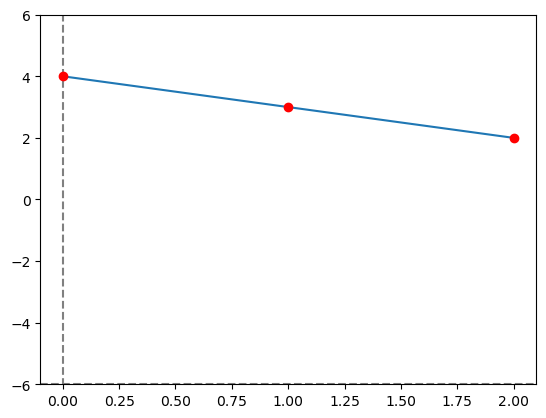

In [114]:
trajectory = np.array(range(4, 1, -1))
harmonics = [0]
plot_show(trajectory, time = 3, harmonics=harmonics)

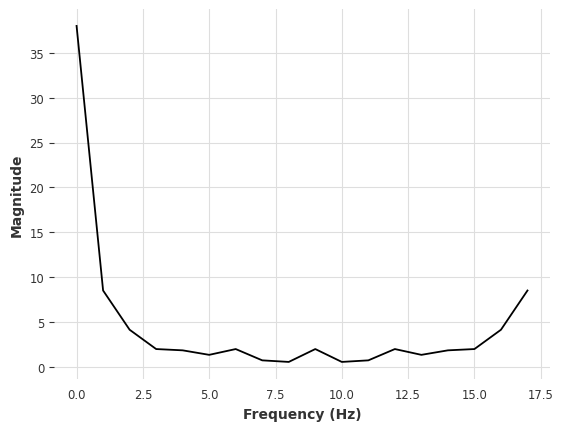

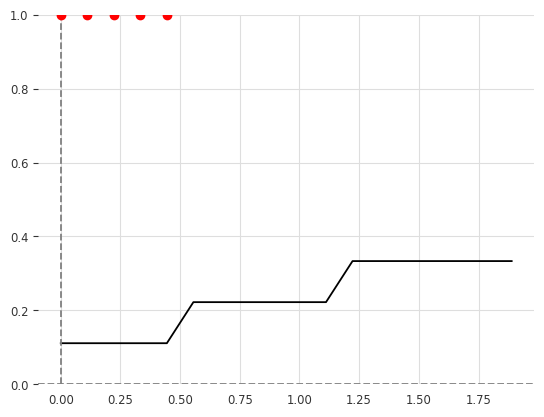

In [135]:
trajectory = np.concatenate([np.repeat(1,5), np.repeat(2,6), np.repeat(3,7)])
plot_show(trajectory, time=2, harmonics=np.arange(0,4), plot_freq=True)

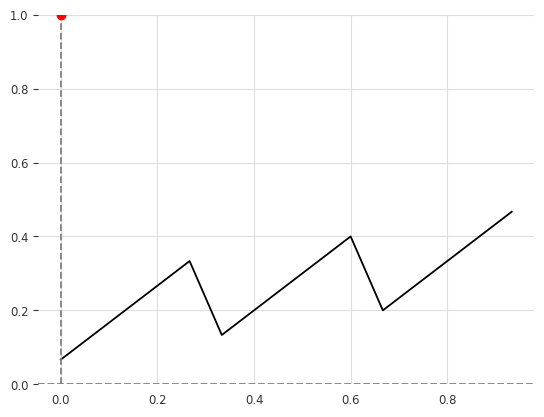

In [136]:
trajectory = np.concatenate([np.arange(1,6), np.arange(2,7), np.arange(3,8)])
plot_show(trajectory, time=1, harmonics=[1,2])

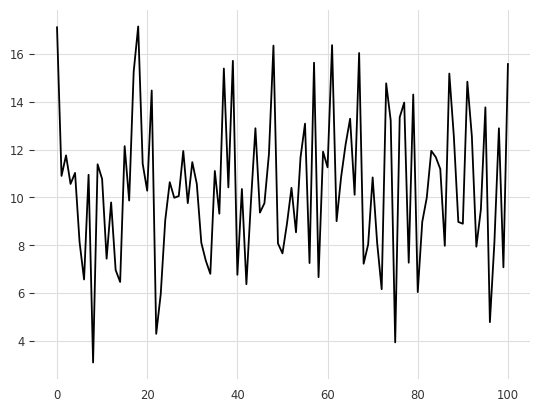

In [141]:
np.random.seed(101)
acq_freq = 200
time = 1
w = 2*np.pi/time
ts = np.linspace(0, time, len(trajectory)*acq_freq)
trajectory = 3*np.random.normal(3,1,101) + 3*np.sin(3*w*ts[:101])
plt.plot(trajectory)
plt.show()

In [143]:
def plot_frequency_spectrum(X_k, xlimits=None):
    N = len(X_k)
    freq = np.fft.fftfreq(N, d=1/acq_freq)
    X_k_magnitude = np.abs(X_k)
    plt.plot(freq[:N//2], X_k_magnitude[:N//2])
    if xlimits:
        plt.xlim(xlimits)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title("Frequency Spectrum")
    plt.show()

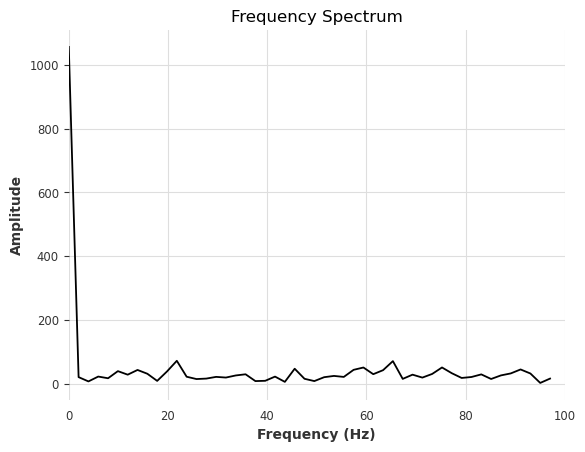

In [144]:
X_k = np.fft.fft(trajectory)
plot_frequency_spectrum(X_k, xlimits=[0,acq_freq/2])

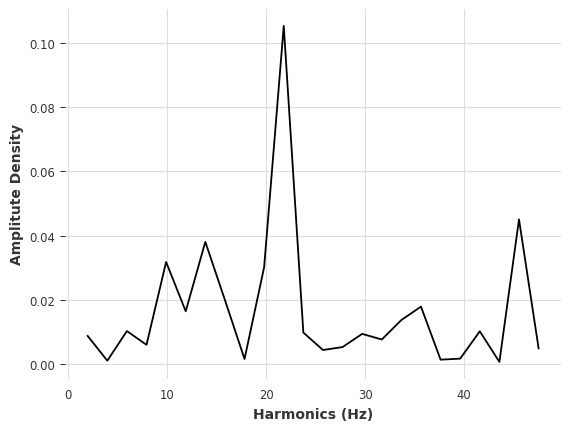

In [151]:
from scipy import signal
f, Pxx = signal.periodogram(trajectory, fs=acq_freq)
harmonics = np.arange(1, len(f)//2)
plt.plot(f[harmonics], Pxx[harmonics]/np.sum(Pxx), linestyle='-')
plt.xlabel("Harmonics (Hz)")
plt.ylabel("Amplitute Density")
plt.show()

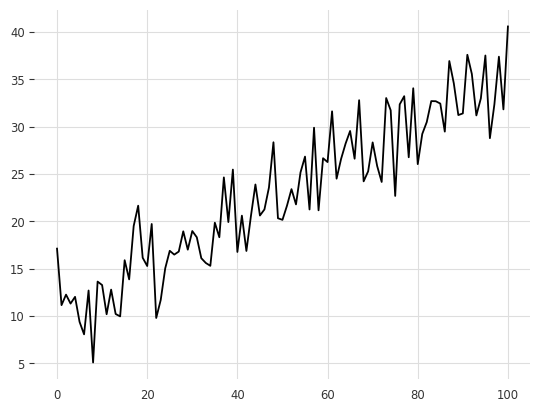

In [153]:
ts = np.linspace(0, time, len(trajectory))
trajectory1 = trajectory + 25*ts
plt.plot(trajectory1)
plt.show()

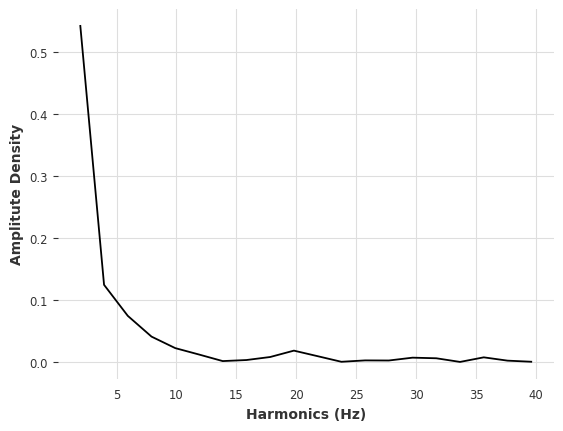

In [154]:
f, Pxx = signal.periodogram(trajectory1, fs=acq_freq)
harmonics = np.arange(1, 21)
plt.plot(f[harmonics], Pxx[harmonics]/np.sum(Pxx), linestyle='-')
plt.xlabel("Harmonics (Hz)")
plt.ylabel("Amplitute Density")
plt.show()

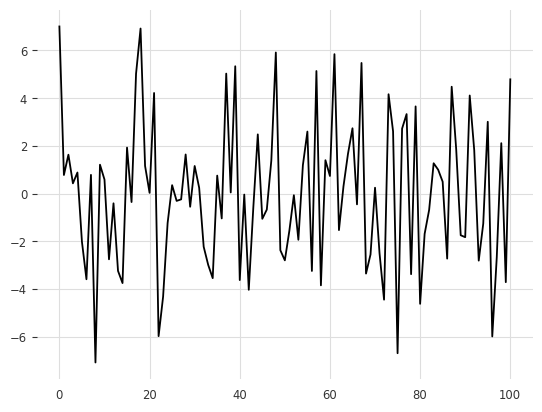

In [155]:
import statsmodels.formula.api as smf

trend = smf.ols(formula='trajectory1 ~ ts', data={"trajectory1": trajectory1, "ts":ts}).fit()
detrended_trajectory = trend.resid
plt.plot(detrended_trajectory)
plt.show()


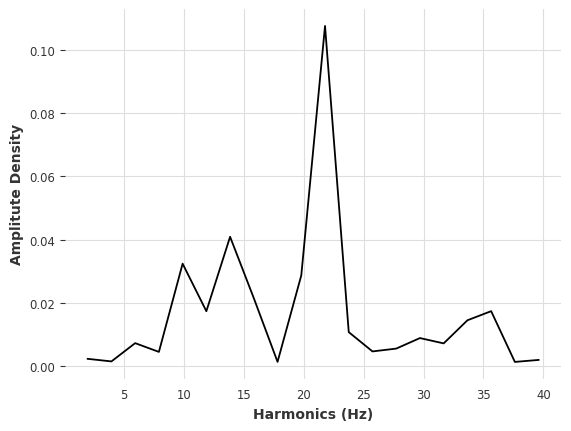

In [156]:
f, Pxx = signal.periodogram(detrended_trajectory, fs=acq_freq)
harmonics = np.arange(1, 21)
plt.plot(f[harmonics], Pxx[harmonics]/np.sum(Pxx), linestyle='-')
plt.xlabel("Harmonics (Hz)")
plt.ylabel("Amplitute Density")
plt.show()

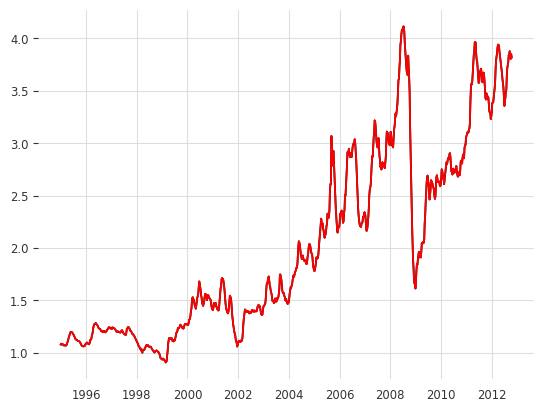

In [158]:
import pandas as pd
import statsmodels.formula.api as smf
prices = pd.read_csv("retailgas.csv")
prices = prices.iloc[::-1]
prices.Date = pd.to_datetime(prices.Date)
prices = prices.set_index("Date")
plt.plot(prices["Price"])

trend = smf.ols(formula='Price ~ 1', data=prices).fit()
plt.plot(prices["Price"], 'r-')
plt.show()

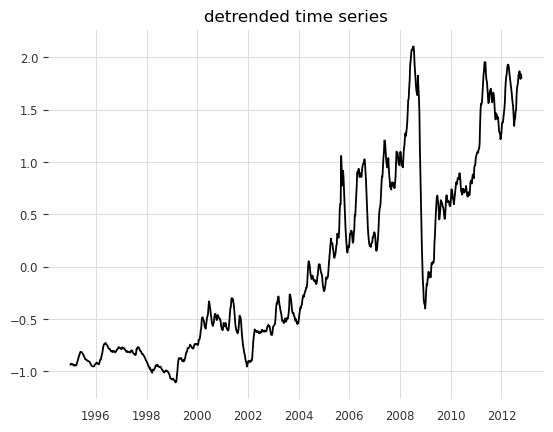

In [160]:
detrended_trajectory = trend.resid
plt.plot(detrended_trajectory)
plt.title("detrended time series")
plt.show()

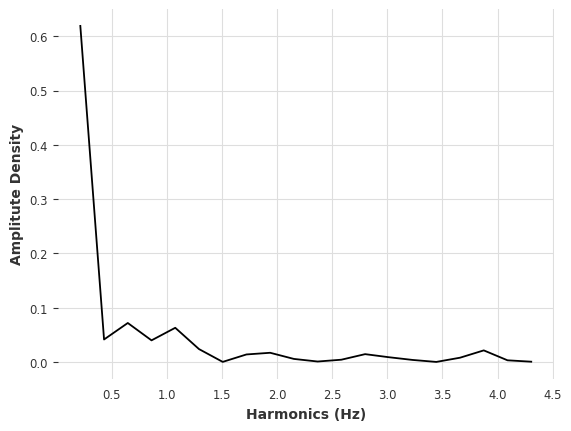

In [161]:
f, Pxx = signal.periodogram(detrended_trajectory, fs=acq_freq)
harmonics = np.arange(1, 21)
plt.plot(f[harmonics], Pxx[harmonics]/np.sum(Pxx), linestyle='-')
plt.xlabel("Harmonics (Hz)")
plt.ylabel("Amplitute Density")
plt.show()

## Bonus on Deep Learning

In [115]:
#pip install darts

In [116]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = pd.read_csv("AirPassengers.csv", delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Month", "#Passengers")

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [118]:
"""
Exponential Smoothing
---------------------
"""

from typing import Optional

import numpy as np
import statsmodels.tsa.holtwinters as hw

from darts.logging import get_logger
from darts.models.forecasting.forecasting_model import LocalForecastingModel
from darts.timeseries import TimeSeries
from darts.utils.utils import ModelMode, SeasonalityMode

logger = get_logger(__name__)


In [119]:
class ExponentialSmoothing(LocalForecastingModel):
    def __init__(
        self,
        trend: Optional[ModelMode] = ModelMode.ADDITIVE,
        damped: Optional[bool] = False,
        seasonal: Optional[SeasonalityMode] = SeasonalityMode.ADDITIVE,
        seasonal_periods: Optional[int] = None,
        random_state: int = 0,
        **fit_kwargs,
    ):

        """Exponential Smoothing

        This is a wrapper around
        `statsmodels  Holt-Winters' Exponential Smoothing
        <https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html>`_;
        we refer to this link for the original and more complete documentation of the parameters.

        `trend` must be a ``ModelMode`` Enum member. You can access the Enum with
         ``from darts.utils.utils import ModelMode``.
        `seasonal` must be a ``SeasonalityMode`` Enum member. You can access the Enum with
        ``from darts.utils.utils import SeasonalityMode``.

        ``ExponentialSmoothing(trend=ModelMode.NONE, seasonal=SeasonalityMode.NONE)`` corresponds to a single
        exponential smoothing.
        ``ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=SeasonalityMode.NONE)`` corresponds to a Holt's
        exponential smoothing.

        Please note that automatic `seasonal_period` selection (setting the `seasonal_periods` parameter equal to
        `None`) can sometimes lead to errors if the input time series is too short. In these cases we suggest to
        manually set the `seasonal_periods` parameter to a positive integer.

        Parameters
        ----------
        trend
            Type of trend component. Either ``ModelMode.ADDITIVE``, ``ModelMode.MULTIPLICATIVE``, ``ModelMode.NONE``,
            or ``None``. Defaults to ``ModelMode.ADDITIVE``.
        damped
            Should the trend component be damped. Defaults to False.
        seasonal
            Type of seasonal component. Either ``SeasonalityMode.ADDITIVE``, ``SeasonalityMode.MULTIPLICATIVE``,
            ``SeasonalityMode.NONE``, or ``None``. Defaults to ``SeasonalityMode.ADDITIVE``.
        seasonal_periods
            The number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily
            data with a weekly cycle. If not set, inferred from frequency of the series.
        fit_kwargs
            Some optional keyword arguments that will be used to call
            :func:`statsmodels.tsa.holtwinters.ExponentialSmoothing.fit()`.
            See `the documentation
            <https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html>`_.
        """
        super().__init__()
        self.trend = trend
        self.damped = damped
        self.seasonal = seasonal
        self.infer_seasonal_periods = seasonal_periods is None
        self.seasonal_periods = seasonal_periods
        self.fit_kwargs = fit_kwargs
        self.model = None
        np.random.seed(random_state)

    def __str__(self):
        return (
            f"ExponentialSmoothing(trend={self.trend}, damped={self.damped}, "
            f"seasonal={self.seasonal}, seasonal_periods={self.seasonal_periods}"
        )

    def fit(self, series: TimeSeries):
        super().fit(series)
        self._assert_univariate(series)
        series = self.training_series

        # if the model was initially created with `self.seasonal_periods=None`, make sure that
        # the model will try to automatically infer the index, otherwise it should use the
        # provided `seasonal_periods` value
        seasonal_periods_param = (
            None if self.infer_seasonal_periods else self.seasonal_periods
        )

        # set the seasonal periods parameter to a default value if it was not provided explicitly
        # and if it cannot be inferred due to the lack of a datetime index
        if self.seasonal_periods is None and series.has_range_index:
            seasonal_periods_param = 12

        hw_model = hw.ExponentialSmoothing(
            series.values(copy=False),
            trend=self.trend if self.trend is None else self.trend.value,
            damped_trend=self.damped,
            seasonal=self.seasonal if self.seasonal is None else self.seasonal.value,
            seasonal_periods=seasonal_periods_param,
            freq=series.freq if series.has_datetime_index else None,
            dates=series.time_index if series.has_datetime_index else None,
        )
        hw_results = hw_model.fit(**self.fit_kwargs)
        self.model = hw_results

        if self.infer_seasonal_periods:
            self.seasonal_periods = hw_model.seasonal_periods

        return self


    def predict(self, n, num_samples=1, verbose: bool = False):
        super().predict(n, num_samples)

        if num_samples == 1:
            forecast = self.model.forecast(n)
        else:
            forecast = np.expand_dims(
                self.model.simulate(n, repetitions=num_samples), axis=1
            )

        return self._build_forecast_series(forecast)


    def _is_probabilistic(self) -> bool:
        return True

    @property
    def min_train_series_length(self) -> int:
        if self.seasonal_periods is not None and self.seasonal_periods > 1:
            return 2 * self.seasonal_periods
        return 3


In [120]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

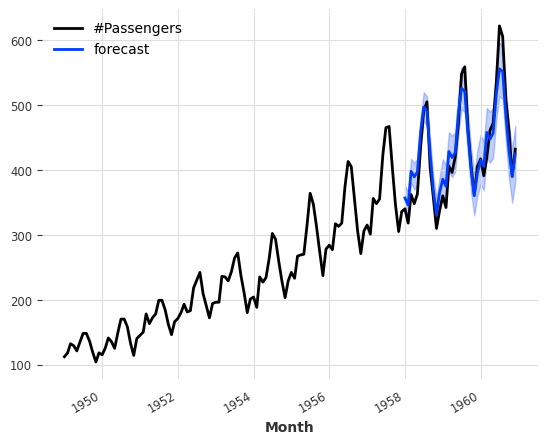

In [121]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [122]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [123]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [124]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

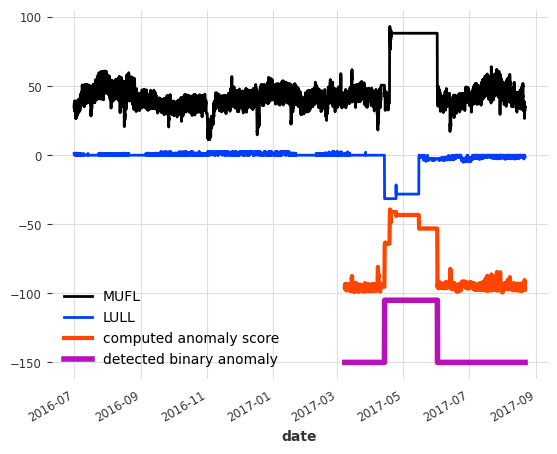

In [125]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)